> Assign -1 for similarity if there is missing in either of the Fields 
(No additional columns)

In [2]:
import pandas as pd
import numpy as np
import libact
from libact.models import SVM
from libact.query_strategies import QUIRE, UncertaintySampling, RandomSampling, ActiveLearningByLearning, HintSVM
import warnings
import matplotlib.pyplot as plt
from libact.models import SklearnAdapter
from sklearn import tree
import seaborn as sbn
import time
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier

In [3]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [4]:
from Utils import *
from Similarity import *

- Get the Data

In [5]:
phone_path ='/Users/bengikoseoglu/Documents/Masters/Semester4/Thesis/Notebooks/1_Merging/tv_merged.csv'
phone_result=pd.read_csv(phone_path)
phone_result.head()

,Unnamed: 0,id_webpage,match,page_closed_captions_(cc),page_subwoofer_out,page_dimming_type,page_auto_photo_mode,page_mhl,page_5.1_channel_audio_out,page_wi-fi_standard,page_composite_video_input(s),page_channel_block_(with_password),page_on-screen_clock,page_viewing_angle_(up/down),page_auto_shut-off,page_digital_audio_output(s),page_hdmi_pc_input_format,page_digital_out_format,page_advanced_contrast_enhancer_(ace),page_net_ad,page_speaker_configuration,page_s-master,page_stereo_system,page_dlna_content,page_advanced_auto_volume,page_face_area_detection,page_on/off_timer,page_speakers_(total),page_hdmi_connection(s)_(total),page_ac_power_input,page_opera_apps_(system),page_hotel_mode_menu,page_analog_audio_input(s)_(total),page_power_saving_modes,page_auto_wide,page_parental_control,page_dolby,page_brand,page_one-touch_mirroring,page_on-screen_display_for_external_input,page_channel_jump,page_signal-to-sound_architecture,page_internet_browser,page_channel_coverage_(digital_terrestrial),page_power_consumption_(in_operation)_max.,page_live_color_technology,page_rf_connection_input(s),page_speaker_position,page_multiple_language_display,page_wi-fi_frequency,page_viewing_angle_(right/left),page_finish_(surface_color),page_wide_mode,page_sound_effects,page_info_banner,page_url,page_headphone/speaker_link,page_component_video_(y/pb/pr)_input(s),page_edit_channel_labels,page_usb_play,page_channel_coverage_(analog),page_picture_mode,page_backlight_type,page_hdmi_pc_input,page_show/hide_channels,page_wi-fi_certified,page_input_video_formats,page_rs-232c_control,page_usb_2.0,page_twin_picture,page_number_of_tuners_(terrestrial/cable),page_tv_sideview,page_tv_system_(digital_cable),page_channel_coverage_(digital_cable),page_condition,page_hdcp,page_sleep_wakeup_timer,page_image_aspect_ratio,page_backlight_off_mode,page_search,page_related_search,page_auto_mute_(on_no_signal),page_headphone_output(s),page_warc,page_wi-fi_direct,page_power_requirements_(voltage),page_phototv_hd,page_screen_size_(cm),page_tv_system_(analog),page_clear_phase,page_connectivity,page_demo_mode,page_dynamic_backlight_control,page_audio_power_output,page_cinemotion_reverse_3,page_rs-232c_input(s),page_ethernet_connection(s),page_tv_system_(digital_terrestrial),page_output_connectors,page_video_processing,page_sony_original_surround,page_24p_true_cinema_technology,page_display_resolution,page_internet_epg,page_motionflow_technology,page_photo_sharing_plus_/_photo_share,page_channel_surf,page_usb_play_(contents),page_mpn,page_power_consumption_(in_standby),page_mhl_version,page_display_type,page_color_system,page_tv_tweet,page_arc_hdmi_(audio_return_channel),page_viewable_size,page_bravia_sync,page_blinking_type,page_model,page_power_requirements_(frequency),page_screen_mirroring(miracast),page_label_inputs,page_commercial_features,page_video_interface,page_product_type,page_3d_technology,page_upc,page_refresh_rate,page_cables_included,page_hdmi_ports,page_height,page_yearly_operating_cost,page_epaet_qualified,page_product_code,page_remote_control_model,page_media_card_slot,page_depth,page_pc_input,page_digital_tv_tuner,page_height_with_stand,page_yearly_consumption,page_display_coating,page_wall_mountable,page_additional_features,page_speakers_type,page_internet_services,page_weight_with_stand,page_video_inputs_qty,page_headphone_jack,page_warranty,page_usb_ports,page_weight,page_smart_capable,page_color,page_speakers_qty,page_rf_antenna_input,page_builtin_dvd_player,page_v_chip_control,page_width,page_curved,page_depth_with_stand,page_audio_surround,page_energy_star_certified,page_ethernet,page_audio_outputs,page_power_supply,page_viewing_angle,page_supported_memory_cards,page_ports,page_tv_tuner,page_wattage_standby,page_voltage,page_hdmi,page_brightness,page_scan_format,page_bundled_items,page_series,page_input_connectors,page_compatible_tv_type,page_compatible_tv_brand,page_response_time,page_builtin_tuner,page_vga,page_manufacturer,page_analog_tuner,page_com

In [6]:
phone_result.shape

(25679, 558)

- Choose attributes

In [7]:
# columns that only exist in pages
only_page_columns =['page_closed_captions_(cc)','page_subwoofer_out','page_dimming_type',
'page_auto_photo_mode','page_mhl','page_5.1_channel_audio_out','page_wi-fi_standard','page_composite_video_input(s)','page_channel_block_(with_password)','page_on-screen_clock','page_viewing_angle_(up/down)','page_auto_shut-off','page_digital_audio_output(s)','page_hdmi_pc_input_format','page_digital_out_format','page_advanced_contrast_enhancer_(ace)','page_net_ad','page_speaker_configuration','page_s-master','page_stereo_system','page_dlna_content','page_advanced_auto_volume','page_face_area_detection','page_on/off_timer','page_speakers_(total)','page_hdmi_connection(s)_(total)','page_ac_power_input','page_opera_apps_(system)','page_hotel_mode_menu','page_analog_audio_input(s)_(total)','page_power_saving_modes','page_auto_wide','page_parental_control','page_dolby','page_one-touch_mirroring','page_on-screen_display_for_external_input','page_channel_jump','page_signal-to-sound_architecture','page_internet_browser','page_channel_coverage_(digital_terrestrial)','page_power_consumption_(in_operation)_max.','page_live_color_technology','page_rf_connection_input(s)','page_speaker_position','page_multiple_language_display','page_wi-fi_frequency','page_viewing_angle_(right/left)','page_finish_(surface_color)','page_wide_mode','page_sound_effects','page_info_banner','page_headphone/speaker_link','page_component_video_(y/pb/pr)_input(s)','page_edit_channel_labels','page_usb_play','page_channel_coverage_(analog)','page_picture_mode','page_backlight_type','page_hdmi_pc_input','page_show/hide_channels','page_wi-fi_certified','page_rs-232c_control','page_usb_2.0','page_twin_picture','page_number_of_tuners_(terrestrial/cable)','page_tv_sideview','page_tv_system_(digital_cable)','page_channel_coverage_(digital_cable)','page_condition','page_hdcp','page_sleep_wakeup_timer','page_backlight_off_mode','page_search','page_related_search','page_auto_mute_(on_no_signal)','page_headphone_output(s)','page_wi-fi_direct','page_power_requirements_(voltage)','page_phototv_hd','page_screen_size_(cm)','page_tv_system_(analog)','page_clear_phase','page_demo_mode','page_dynamic_backlight_control','page_audio_power_output','page_cinemotion_reverse_3','page_rs-232c_input(s)','page_ethernet_connection(s)','page_tv_system_(digital_terrestrial)','page_output_connectors','page_video_processing','page_sony_original_surround','page_24p_true_cinema_technology','page_internet_epg','page_motionflow_technology','page_photo_sharing_plus_/_photo_share','page_channel_surf','page_usb_play_(contents)','page_power_consumption_(in_standby)','page_mhl_version','page_color_system','page_tv_tweet','page_arc_hdmi_(audio_return_channel)','page_bravia_sync','page_blinking_type','page_power_requirements_(frequency)','page_screen_mirroring(miracast)','page_label_inputs','page_upc','page_cables_included','page_yearly_operating_cost','page_epaet_qualified','page_product_code','page_media_card_slot','page_pc_input','page_height_with_stand','page_display_coating','page_wall_mountable','page_additional_features','page_weight_with_stand','page_video_inputs_qty','page_headphone_jack','page_smart_capable','page_rf_antenna_input','page_v_chip_control','page_curved','page_depth_with_stand','page_energy_star_certified','page_ethernet','page_audio_outputs','page_power_supply','page_ports','page_hdmi','page_scan_format','page_bundled_items','page_input_connectors','page_compatible_tv_type','page_compatible_tv_brand','page_builtin_tuner','page_vga','page_manufacturer','page_analog_tuner','page_component_video','page_digital_audio_output','page_video_signal_standard','page_combo_type','page_video_formats','page_audio_formats','page_composite_video','page_headphone','page_multi_pack_indicator','page_battery_type','page_remote_included','page_green_compliant','page_network_rj45','page_width_with_stand','page_interactive_features','page_3d_glasses_required','page_internet_access','page_media_player','page_pc_streaming','page_usb_standard','page_rms_output_power','page_processor_type','page_website','page_assembled_product_dimensions_(l_x_w_x_h)','page_ean','page_tv_sideview™','page_rs–232c_control','page_auto_shut–off','page_one–touch_mirroring','page_on–screen_display_for_external_input','page_on–screen_clock','page_s–master','page_illumination_led','page_signal–to–sound_architecture','page_country_of_manufacture','page_origin','page_component','page_rs232c','page_shipping_size_(w_x_h_x_d)','page_eco_sensor','page_connectshare™','page_purcolor_(color_accuracy)','page_dtv_tuner_','page_speaker_type','page_vesa_wall_mount_compatibility','page_ultra_clear_panel','page_user_manual','page_yes','page_product_weight_with_stand','page_wi-fi','page_osd_language','page_power_supply_(v)','page_v-chip','page_wattage','page_anynet+™_(hdmi-cec)','page_bd_wise™_plus','page_e-manual','page_uhd_upscaling','page_smart_evolution_ready','page_mobile_to_tv_-_mirroring,_dlna','page_audio_out_(mini_jack)','page_motion_rate*','page_product_weight_without_stand','page_shipping_weight','page_standby_power_consumption','page_apps_platform','page_power_cable','page_smart_hub','page_dimming_technology','page_closed_captioning','page_tv_to_mobile_-_mirroring','page_electronic_program_guide_(channel_guide)','page_energy_star_certified_','page_rf_in_(terrestrial/cable_input)','page_composite_in_(av)','page_sound_effect','page_depth_enhancing_technology','page_digital_audio_out_(optical)','page_processor','page_sound_output_(rms)','page_remote','page_product_size_(w_x_h_x_d)_with_stand','page_dts_premium_sound','page_touchscreen','page_hdtv','page_wall_mount_dimensions','page_additional_deatures_3d','page_has_integrated_speakers','page_manufacturer_part_number','page_batteries_required','page_series_title','page_product_dimensions','page_has_touchscreen','page_languages','page_product_accessories_included','page_industrial','page_interface_type','page_video_game_platform','page_about_the_brand','page_additional_features_3d','page_isbn','page_front_input_connectors','page_energy_star','page_speaker_power','page_remote_control_type_(originally_supplied_by_manufacturer)','page_rear_output_connectors','page_rear_input_connectors','page_product_highlights','page_built-in_tuner','page_supported_resolutions','page_local_diming','page_smart_functionality','page_dimensions_(w_x_h_x_d)_tv_without_stand','page_dimensions_(w_x_h_x_d)_tv_with_stand','page_inputs','page_tv_model','page_important_message','page_board_number','page_warehouse_location','page_part_type','page_smart_tv_features','page_mounting_features','page_ethernet_technology','page_component_in_ports','page_easy_pairing','page_motion_rate','page_digital_audio_out_(optical_)','page_anynet+_(hdmi-cec)','page_connectshare','page_bd_wise_plus','page_mobile_to_tv-mirroring,_dlna','page_rvu','page_motion_control','page_nano_crystal_color','page_item_condition','page_bluetooth','page_stand_type','page_smart_view_2.0','page_fire','page_dtv_tuner','page_briefing_on_tv','page_triluminos_display','page_region_code','page_front_output_connectors','page_exterior_color','page_known_part_number(s)','page_grade','page_known_model(s)','page_marketing_information','page_stand_part_#','page_stand_condition','page_screws__included','page_tv_compatibility','page_supported_models_','page_specifications','page_tv_version_no','page_board_number(s)','page_tv_type_no','page_supported_specifications','page_tv_model_code','page_part_usage','page_compatible_tv_brands','page_tv_model_no','page_picture_engine','page_sound_optimizer','page_analog_tv_reception','page_launch_year','page_skin_naturalizer','page_sound_booster','page_picture_adjustments_lock','page_reflector','page_picture_frame_mode','page_usb_super_multi-format_play','page_input_skip','page_start_up_sony_logo_display','page_image_contrast_ratio','page_panorama','page_hdmi_instaport','page_main_features','page_msrp','page_manufacturer_website_address','page_quantity','page_p/n','page_actual_weight','page_family','page_sony_entertainment_network','page_3d_super-resolution','page_skype','page_x2_widget_(system)','page_fast_zapping','page_seamless_streaming','page_3d_sync_transmitter_integrated','page_auto_3d_depth_adjustment','page_text_search','page_sense_of_quartz','page_bivl_(system)','page_simulated_3d','page_google_tv_sync','page_deep_black_panel','page_wifi_connection','page_display_technology','page_room_type','page_screen_refresh_rate','page_composite_inputs','page_sound_leveler','page_energy_star_qualified','page_component_video_inputs','page_hdmi_inputs','page_watts/channel','page_vesa_mounting','page_product_number','page_speaker_output_power','page_tv_type','page_contained_battery_type','page_important','page_substitute_parts','page_tv_part_types','page_panel_sticker_number','page_compatible_tv_models','page_notes,_comments_&_additional_information','page_mfr_part_number_1','page_internet_streaming_services','page_hdcp_compatible','page_power','page_dimensions_(wxdxh)','page_power_consumption_operational','page_multi-channel_preview','page_manufacturer_warranty','page_speaker_system','page_hdmi_ports_qty','page_lcd_backlight_technology','page_diagonal_size','page_vesa','page_streaming_service','page_family_line','page_compatible_with_','page_gtin','page_country/region_of_manufacture','page_audio/video_inputs','page_wifi','page_led','page_internet_streaming','page_built_ins','page_compliant_standards','page_panel_number','page_model_','page_version','page_interval','page_length_of_cord','page_exposure_time','page_timer_delay','page_operating_temperature','page_battery_life','page_number_of_shots','page_power_source','page_board','page_does_not_apply','page_6870c-0535d','page_t-con','page_lg','page_television_type','page_features','page_assembled_product_weight','page_is_remote_control_included','page_fits_tv_screen_size_up_to']
print(len(only_page_columns))

407


In [8]:
# columns that only exist in catalog
only_cat_columns=['cat_stand', 'cat_wifi_protocol', 'cat_package_height', 'cat_supported_picture_formats', 'cat_package_depth', 'cat_supported_computer_resolution', 'cat_package_width', 'cat_timer_functions', 'cat_memory']
print(len(only_cat_columns))

9


In [9]:
# columns that are ids, target and matching attributes
matches = ['id_webpage','prodcat_id','page_url', 'page_warc', 'prodcat_product_name','match','cat_model', 'page_model','cat_mpn', 'page_mpn','cat_product_gtin', 'page_product_gtin','cat_product_type', 'page_product_type', 'cat_brand', 'page_brand', 'cat_pc_interface', 'page_pc_interface', 'cat_motion_enhancement_technology','page_motion_enhancement_technology', 'cat_image_contrast', 'page_image_contrast', 'cat_depth', 'page_depth','cat_height', 'page_height', 'cat_weight', 'page_weight', 'cat_width', 'page_width', 'cat_closed_caption_capability', 'page_closed_caption_capability', 'cat_dimensions_with_stand', 'page_dimensions_with_stand', 'cat_dimensions_without_stand', 'page_dimensions_without_stand', 'cat_analog_tv_tuner', 'page_analog_tv_tuner', 'cat_video_interface', 'page_video_interface', 'cat_viewing_angle', 'page_viewing_angle', 'cat_stand_design', 'page_stand_design', 'cat_tv_tuner', 'page_tv_tuner', 'cat_refresh_rate', 'page_refresh_rate', 'cat_total_size', 'page_total_size', 'cat_yearly_consumption', 'page_yearly_consumption', 'cat_display_resolution', 'page_display_resolution', 'cat_backlight_technology', 'page_backlight_technology', 'cat_image_aspect_ratio', 'page_image_aspect_ratio', 'cat_computer_operating_system', 'page_computer_operating_system', 'cat_response_time', 'page_response_time', 'cat_batteries_included', 'page_contains_batteries', 'cat_hdmi_ports', 'page_hdmi_ports', 'cat_speakers_type', 'page_speakers_type', 'cat_channel_lock', 'page_channel_lock', 'cat_widescreen_modes', 'page_widescreen_modes', 'cat_supported_audio_formats', 'page_supported_audio_formats', 'cat_connectivity', 'page_connectivity', 'cat_series', 'page_series', 'cat_stereo_reception_system', 'page_stereo_reception_system', 'cat_24p_technology', 'page_24p_technology', 'cat_dlna', 'page_dlna', 'cat_supported_memory_cards', 'page_supported_memory_cards', 'cat_commercial_features', 'page_commercial_features', 'cat_digital_tv_tuner', 'page_digital_tv_tuner', 'cat_wattage_operational', 'page_wattage_operational', 'cat_digital_audio_format', 'page_digital_audio_format', 'cat_voltage', 'page_voltage', 'cat_hdcp_compatability', 'page_hdcp_compatability', 'cat_display_type', 'page_display_type', 'cat_remote_control_model', 'page_remote_control_model', 'cat_usb_ports', 'page_usb_ports', 'cat_builtin_dvd_player', 'page_builtin_dvd_player', 'cat_package_weight', 'page_package_weight', 'cat_warranty', 'page_warranty', 'cat_wattage_standby', 'page_wattage_standby', 'cat_audio_surround', 'page_audio_surround', 'cat_internet_services', 'page_internet_services', 'cat_input_video_formats', 'page_input_video_formats', 'cat_brightness', 'page_brightness', 'cat_color', 'page_color', 'cat_speakers_qty', 'page_speakers_qty', 'cat_3d_technology', 'page_3d_technology', 'cat_viewable_size', 'page_viewable_size', 'cat_supported_video_formats', 'page_digital_video_formats', 'cat_supported_languages', 'page_language_options', 'cat_stand_color', 'page_stand_type_(color)', 'cat_secondary_audio_program', 'page_alternate_audio_(digital)', 'cat_compatible_channels', 'page_number_of_channels', 'cat_3d', 'page_3d_format_support']
print(len(matches))

140


In [10]:
cols_inorder= matches.copy()
cols_inorder.extend(only_cat_columns)
cols_inorder.extend(only_page_columns)
phone_result_sub=phone_result[cols_inorder]
phone_result_sub.head()

,id_webpage,prodcat_id,page_url,page_warc,prodcat_product_name,match,cat_model,page_model,cat_mpn,page_mpn,cat_product_gtin,page_product_gtin,cat_product_type,page_product_type,cat_brand,page_brand,cat_pc_interface,page_pc_interface,cat_motion_enhancement_technology,page_motion_enhancement_technology,cat_image_contrast,page_image_contrast,cat_depth,page_depth,cat_height,page_height,cat_weight,page_weight,cat_width,page_width,cat_closed_caption_capability,page_closed_caption_capability,cat_dimensions_with_stand,page_dimensions_with_stand,cat_dimensions_without_stand,page_dimensions_without_stand,cat_analog_tv_tuner,page_analog_tv_tuner,cat_video_interface,page_video_interface,cat_viewing_angle,page_viewing_angle,cat_stand_design,page_stand_design,cat_tv_tuner,page_tv_tuner,cat_refresh_rate,page_refresh_rate,cat_total_size,page_total_size,cat_yearly_consumption,page_yearly_consumption,cat_display_resolution,page_display_resolution,cat_backlight_technology,page_backlight_technology,cat_image_aspect_ratio,page_image_aspect_ratio,cat_computer_operating_system,page_computer_operating_system,cat_response_time,page_response_time,cat_batteries_included,page_contains_batteries,cat_hdmi_ports,page_hdmi_ports,cat_speakers_type,page_speakers_type,cat_channel_lock,page_channel_lock,cat_widescreen_modes,page_widescreen_modes,cat_supported_audio_formats,page_supported_audio_formats,cat_connectivity,page_connectivity,cat_series,page_series,cat_stereo_reception_system,page_stereo_reception_system,cat_24p_technology,page_24p_technology,cat_dlna,page_dlna,cat_supported_memory_cards,page_supported_memory_cards,cat_commercial_features,page_commercial_features,cat_digital_tv_tuner,page_digital_tv_tuner,cat_wattage_operational,page_wattage_operational,cat_digital_audio_format,page_digital_audio_format,cat_voltage,page_voltage,cat_hdcp_compatability,page_hdcp_compatability,cat_display_type,page_display_type,cat_remote_control_model,page_remote_control_model,cat_usb_ports,page_usb_ports,cat_builtin_dvd_player,page_builtin_dvd_player,cat_package_weight,page_package_weight,cat_warranty,page_warranty,cat_wattage_standby,page_wattage_standby,cat_audio_surround,page_audio_surround,cat_internet_services,page_internet_services,cat_input_video_formats,page_input_video_formats,cat_brightness,page_brightness,cat_color,page_color,cat_speakers_qty,page_speakers_qty,cat_3d_technology,page_3d_technology,cat_viewable_size,page_viewable_size,cat_supported_video_formats,page_digital_video_formats,cat_supported_languages,page_language_options,cat_stand_color,page_stand_type_(color),cat_secondary_audio_program,page_alternate_audio_(digital),cat_compatible_channels,page_number_of_channels,cat_3d,page_3d_format_support,cat_stand,cat_wifi_protocol,cat_package_height,cat_supported_picture_formats,cat_package_depth,cat_supported_computer_resolution,cat_package_width,cat_timer_functions,cat_memory,page_closed_captions_(cc),page_subwoofer_out,page_dimming_type,page_auto_photo_mode,page_mhl,page_5.1_channel_audio_out,page_wi-fi_standard,page_composite_video_input(s),page_channel_block_(with_password),page_on-screen_clock,page_viewing_angle_(up/down),page_auto_shut-off,page_digital_audio_output(s),page_hdmi_pc_input_format,page_digital_out_format,page_advanced_contrast_enhancer_(ace),page_net_ad,page_speaker_configuration,page_s-master,page_stereo_system,page_dlna_content,page_advanced_auto_volume,page_face_area_detection,page_on/off_timer,page_speakers_(total),page_hdmi_connection(s)_(total),page_ac_power_input,page_opera_apps_(system),page_hotel_mode_menu,page_analog_audio_input(s)_(total),page_power_saving_modes,page_auto_wide,page_parental_control,page_dolby,page_one-touch_mirroring,page_on-screen_display_for_external_input,page_channel_jump,page_signal-to-sound_architecture,page_internet_browser,page_channel_coverage_(digital_terrestrial),page_power_consumption_(in_operation)_max.,page_live_color_technology,page_rf_connection_input(s),page_speaker_position,page_multiple_lang

In [11]:
print(len(phone_result_sub.columns))
print(len(set(phone_result_sub.columns)))

556
556


- Look at missing values

In [12]:
phone_result_stat=get_stats_table(phone_result_sub,only_page_columns,only_cat_columns)
phone_result_stat.to_excel('phone_result_stats.xlsx')
print(phone_result_stat.shape)

(556, 8)


In [13]:
phone_result_stat

,count,no_unique,no_missing,percent_missing,only in page,only in catalog,most_freq,no_most_freq
column_name,,,,,,,,
id_webpage,25679,428,0,0.000,0,0,node14d3aa4b3f442757c1d5193f5b032d2,60
prodcat_id,25679,60,0,0.000,0,0,f0311503-4d5a-4f53-a7f0-ef08edf80b1d,428
page_url,25679,427,0,0.000,0,0,http://www.sony.com/electronics/televisions/xb...,120
page_warc,25679,8,0,0.000,0,0,ebay.com0.warc.nq.gz,22140
prodcat_product_name,25679,60,0,0.000,0,0,samsung un40ju6700,428
match,25679,2,0,0.000,0,0,0,25495
cat_model,25679,59,0,0.000,0,0,xbr43x830c,855
page_model,11459,66,14220,0.554,0,0,nan,14220
cat_mpn,25679,60,0,0.000,0,0,d43-c1,428


- Drop missing values

In [14]:
full_missing_columns=list(phone_result_stat[phone_result_stat['percent_missing']==1].index)
print(full_missing_columns)

[]


In [15]:
# find missing values correspodence in pages and category
page_col_drop=['page_'+i[4:] for i in full_missing_columns]
cat_col_drop=['cat_'+i[4:] for i in full_missing_columns]
cat_col_drop.extend(page_col_drop)
print(cat_col_drop)

[]


In [16]:
# check whether every column exists
df_columns=list(phone_result_sub.columns)
new_drop=[]
for i in cat_col_drop:
    if(i in df_columns):
        new_drop.append(i)
new_drop

[]

In [17]:
# actually drop them
phone_result_sub=phone_result_sub.drop(new_drop,axis=1)
print(phone_result_sub.shape)
print(phone_result_sub.columns)

(25679, 556)
Index(['id_webpage', 'prodcat_id', 'page_url', 'page_warc',
       'prodcat_product_name', 'match', 'cat_model', 'page_model', 'cat_mpn',
       'page_mpn',
       ...
       'page_board', 'page_does_not_apply', 'page_6870c-0535d', 'page_t-con',
       'page_lg', 'page_television_type', 'page_features',
       'page_assembled_product_weight', 'page_is_remote_control_included',
       'page_fits_tv_screen_size_up_to'],
      dtype='object', length=556)


- Drop variables only in the categories, if they still exist

In [18]:
# check whether only category columns are still exist or not
df_columns=list(phone_result_sub.columns)
new_drop=[]
for i in only_cat_columns:
    if(i in df_columns):
        new_drop.append(i)
new_drop

['cat_stand',
 'cat_wifi_protocol',
 'cat_package_height',
 'cat_supported_picture_formats',
 'cat_package_depth',
 'cat_supported_computer_resolution',
 'cat_package_width',
 'cat_timer_functions',
 'cat_memory']

In [19]:
len(new_drop)

9

In [20]:
phone_result_sub=phone_result_sub.drop(new_drop,axis=1)
print(phone_result_sub.shape)

(25679, 547)


- Drop variables only in the pages, if they still exist

In [21]:
# check whether only category columns are still exist or not
df_columns=list(phone_result_sub.columns)
new_drop=[]
for i in only_page_columns:
    if(i in df_columns):
        new_drop.append(i)
new_drop

['page_closed_captions_(cc)',
 'page_subwoofer_out',
 'page_dimming_type',
 'page_auto_photo_mode',
 'page_mhl',
 'page_5.1_channel_audio_out',
 'page_wi-fi_standard',
 'page_composite_video_input(s)',
 'page_channel_block_(with_password)',
 'page_on-screen_clock',
 'page_viewing_angle_(up/down)',
 'page_auto_shut-off',
 'page_digital_audio_output(s)',
 'page_hdmi_pc_input_format',
 'page_digital_out_format',
 'page_advanced_contrast_enhancer_(ace)',
 'page_net_ad',
 'page_speaker_configuration',
 'page_s-master',
 'page_stereo_system',
 'page_dlna_content',
 'page_advanced_auto_volume',
 'page_face_area_detection',
 'page_on/off_timer',
 'page_speakers_(total)',
 'page_hdmi_connection(s)_(total)',
 'page_ac_power_input',
 'page_opera_apps_(system)',
 'page_hotel_mode_menu',
 'page_analog_audio_input(s)_(total)',
 'page_power_saving_modes',
 'page_auto_wide',
 'page_parental_control',
 'page_dolby',
 'page_one-touch_mirroring',
 'page_on-screen_display_for_external_input',
 'page_chann

In [22]:
len(new_drop)

407

In [23]:
phone_result_sub=phone_result_sub.drop(new_drop,axis=1)
print(phone_result_sub.shape)

(25679, 140)


- Drop unneccesary ids

In [24]:
# drop further ids
drop_2=['page_url', 'page_warc','prodcat_product_name']
phone_result_sub=phone_result_sub.drop(drop_2,axis=1)
print(phone_result_sub.shape)

(25679, 137)


In [25]:
# rename columns
phone_result_sub.columns=['id_webpage','prodcat_id','match','cat_model','page_model','cat_mpn','page_mpn','cat_product_gtin','page_product_gtin','cat_product_type','page_product_type','cat_brand','page_brand','cat_pc_interface','page_pc_interface','cat_motion_enhancement_technology','page_motion_enhancement_technology','cat_image_contrast','page_image_contrast','cat_depth','page_depth','cat_height','page_height','cat_weight','page_weight','cat_width','page_width','cat_closed_caption_capability','page_closed_caption_capability','cat_dimensions_with_stand','page_dimensions_with_stand','cat_dimensions_without_stand','page_dimensions_without_stand','cat_analog_tv_tuner','page_analog_tv_tuner','cat_video_interface','page_video_interface','cat_viewing_angle','page_viewing_angle','cat_stand_design','page_stand_design','cat_tv_tuner','page_tv_tuner','cat_refresh_rate','page_refresh_rate','cat_total_size','page_total_size','cat_yearly_consumption','page_yearly_consumption','cat_display_resolution','page_display_resolution','cat_backlight_technology','page_backlight_technology','cat_image_aspect_ratio','page_image_aspect_ratio','cat_computer_operating_system','page_computer_operating_system','cat_response_time','page_response_time','cat_batteries_included','page_batteries_included','cat_hdmi_ports','page_hdmi_ports','cat_speakers_type','page_speakers_type','cat_channel_lock','page_channel_lock','cat_widescreen_modes','page_widescreen_modes','cat_supported_audio_formats','page_supported_audio_formats','cat_connectivity','page_connectivity','cat_series','page_series','cat_stereo_reception_system','page_stereo_reception_system','cat_24p_technology','page_24p_technology','cat_dlna','page_dlna','cat_supported_memory_cards','page_supported_memory_cards','cat_commercial_features','page_commercial_features','cat_digital_tv_tuner','page_digital_tv_tuner','cat_wattage_operational','page_wattage_operational','cat_digital_audio_format','page_digital_audio_format','cat_voltage','page_voltage','cat_hdcp_compatability','page_hdcp_compatability','cat_display_type','page_display_type','cat_remote_control_model','page_remote_control_model','cat_usb_ports','page_usb_ports','cat_builtin_dvd_player','page_builtin_dvd_player','cat_package_weight','page_package_weight','cat_warranty','page_warranty','cat_wattage_standby','page_wattage_standby','cat_audio_surround','page_audio_surround','cat_internet_services','page_internet_services','cat_input_video_formats','page_input_video_formats','cat_brightness','page_brightness','cat_color','page_color','cat_speakers_qty','page_speakers_qty','cat_3d_technology','page_3d_technology','cat_viewable_size','page_viewable_size','cat_supported_video_formats','page_supported_video_formats','cat_supported_languages','page_supported_languages','cat_stand_color','page_stand_color','cat_secondary_audio_program','page_secondary_audio_program','cat_compatible_channels','page_compatible_channels','cat_3d','page_3d']

In [26]:
phone_result_sub.head()

,id_webpage,prodcat_id,match,cat_model,page_model,cat_mpn,page_mpn,cat_product_gtin,page_product_gtin,cat_product_type,page_product_type,cat_brand,page_brand,cat_pc_interface,page_pc_interface,cat_motion_enhancement_technology,page_motion_enhancement_technology,cat_image_contrast,page_image_contrast,cat_depth,page_depth,cat_height,page_height,cat_weight,page_weight,cat_width,page_width,cat_closed_caption_capability,page_closed_caption_capability,cat_dimensions_with_stand,page_dimensions_with_stand,cat_dimensions_without_stand,page_dimensions_without_stand,cat_analog_tv_tuner,page_analog_tv_tuner,cat_video_interface,page_video_interface,cat_viewing_angle,page_viewing_angle,cat_stand_design,page_stand_design,cat_tv_tuner,page_tv_tuner,cat_refresh_rate,page_refresh_rate,cat_total_size,page_total_size,cat_yearly_consumption,page_yearly_consumption,cat_display_resolution,page_display_resolution,cat_backlight_technology,page_backlight_technology,cat_image_aspect_ratio,page_image_aspect_ratio,cat_computer_operating_system,page_computer_operating_system,cat_response_time,page_response_time,cat_batteries_included,page_batteries_included,cat_hdmi_ports,page_hdmi_ports,cat_speakers_type,page_speakers_type,cat_channel_lock,page_channel_lock,cat_widescreen_modes,page_widescreen_modes,cat_supported_audio_formats,page_supported_audio_formats,cat_connectivity,page_connectivity,cat_series,page_series,cat_stereo_reception_system,page_stereo_reception_system,cat_24p_technology,page_24p_technology,cat_dlna,page_dlna,cat_supported_memory_cards,page_supported_memory_cards,cat_commercial_features,page_commercial_features,cat_digital_tv_tuner,page_digital_tv_tuner,cat_wattage_operational,page_wattage_operational,cat_digital_audio_format,page_digital_audio_format,cat_voltage,page_voltage,cat_hdcp_compatability,page_hdcp_compatability,cat_display_type,page_display_type,cat_remote_control_model,page_remote_control_model,cat_usb_ports,page_usb_ports,cat_builtin_dvd_player,page_builtin_dvd_player,cat_package_weight,page_package_weight,cat_warranty,page_warranty,cat_wattage_standby,page_wattage_standby,cat_audio_surround,page_audio_surround,cat_internet_services,page_internet_services,cat_input_video_formats,page_input_video_formats,cat_brightness,page_brightness,cat_color,page_color,cat_speakers_qty,page_speakers_qty,cat_3d_technology,page_3d_technology,cat_viewable_size,page_viewable_size,cat_supported_video_formats,page_supported_video_formats,cat_supported_languages,page_supported_languages,cat_stand_color,page_stand_color,cat_secondary_audio_program,page_secondary_audio_program,cat_compatible_channels,page_compatible_channels,cat_3d,page_3d
0,node2adaa221ac4791c47f29f345972f1c91,84e2838d-a419-4a5b-a284-9463b01cea52,0,55eg9600,d43-c1,55eg9600/us,d43-c1,719192596955,NaN,curved oled tv - smart tv,NaN,lg,vizio,NaN,NaN,NaN,NaN,NaN,"200,000 1 dynamic contrast ratio",2 in,NaN,28.3 in,NaN,33.7 lbs,NaN,48 in,NaN,NaN,NaN,48 in x 8.4 in x 29.9 in,NaN,48 in x 2 in x 28.3 in,37.99 x 8.27 x 24.53,NaN,NaN,"component, composite, hdmi",NaN,NaN,NaN,tabletop,NaN,NaN,NaN,NaN,NaN,55 in,NaN,NaN,NaN,3840 x 2160,1080p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 port(s),NaN,2 x main channel speaker - built-in - 10 watt,NaN,NaN,NaN,just scan,NaN,"mp3, wma, pcm, ac3, aac, he-aac, e-ac3, dts",NaN,"wi-fi, lan",NaN,eg9600,NaN,mts,NaN,24p real cinema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ac 120/230 v ( 50/60 hz ),NaN,yes,NaN,4k uhdtv (2160p),led,universal remote control,NaN,3 port(s),NaN,NaN,NaN,55.3 lbs,25.8 lbs,1 year,NaN,0.3 watt,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,black,2,NaN,passive,NaN,54.6 in,43 in,divx hd,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN
1,nodeb452c577135dea4d89c4fcd40b9ac4f,84e2838d-a419-4a5b-a284-9463b01cea52,0,55eg9600,d43-c1,55eg9600/us,d43-c1,719192596955,NaN,curved oled tv - smart tv,NaN,lg,vizio,NaN,NaN,NaN,NaN,NaN,200000:1,2 in,NaN,28.3 in,NaN,33.7 lbs,NaN,48 in,NaN,NaN,NaN,48 in x 8.4 in x 29.9 in,NaN,48 in x 2 in x 28.3 in,37.99 x 8.27 x

- calculate similarities (jaccard, levenstein, jaro-winkler)

In [27]:
page_columns=get_clean_collist(phone_result_sub, 'page')
cat_columns=get_clean_collist(phone_result_sub, 'cat')
jac_columns_el=get_clean_collist(phone_result_sub, 'jac')
lev_columns_el =get_clean_collist(phone_result_sub, 'lev')
jaro_columns_el =get_clean_collist(phone_result_sub, 'jaro')
p_result_nomiss=calculate_similarities_option4(phone_result_sub,page_columns,cat_columns,jac_columns_el,lev_columns_el,jaro_columns_el)
p_result_nomiss.head()

,id_webpage,prodcat_id,match,cat_model,page_model,cat_mpn,page_mpn,cat_product_gtin,page_product_gtin,cat_product_type,page_product_type,cat_brand,page_brand,cat_pc_interface,page_pc_interface,cat_motion_enhancement_technology,page_motion_enhancement_technology,cat_image_contrast,page_image_contrast,cat_depth,page_depth,cat_height,page_height,cat_weight,page_weight,cat_width,page_width,cat_closed_caption_capability,page_closed_caption_capability,cat_dimensions_with_stand,page_dimensions_with_stand,cat_dimensions_without_stand,page_dimensions_without_stand,cat_analog_tv_tuner,page_analog_tv_tuner,cat_video_interface,page_video_interface,cat_viewing_angle,page_viewing_angle,cat_stand_design,page_stand_design,cat_tv_tuner,page_tv_tuner,cat_refresh_rate,page_refresh_rate,cat_total_size,page_total_size,cat_yearly_consumption,page_yearly_consumption,cat_display_resolution,page_display_resolution,cat_backlight_technology,page_backlight_technology,cat_image_aspect_ratio,page_image_aspect_ratio,cat_computer_operating_system,page_computer_operating_system,cat_response_time,page_response_time,cat_batteries_included,page_batteries_included,cat_hdmi_ports,page_hdmi_ports,cat_speakers_type,page_speakers_type,cat_channel_lock,page_channel_lock,cat_widescreen_modes,page_widescreen_modes,cat_supported_audio_formats,page_supported_audio_formats,cat_connectivity,page_connectivity,cat_series,page_series,cat_stereo_reception_system,page_stereo_reception_system,cat_24p_technology,page_24p_technology,cat_dlna,page_dlna,cat_supported_memory_cards,page_supported_memory_cards,cat_commercial_features,page_commercial_features,cat_digital_tv_tuner,page_digital_tv_tuner,cat_wattage_operational,page_wattage_operational,cat_digital_audio_format,page_digital_audio_format,cat_voltage,page_voltage,cat_hdcp_compatability,page_hdcp_compatability,cat_display_type,page_display_type,cat_remote_control_model,page_remote_control_model,cat_usb_ports,page_usb_ports,cat_builtin_dvd_player,page_builtin_dvd_player,cat_package_weight,page_package_weight,cat_warranty,page_warranty,cat_wattage_standby,page_wattage_standby,cat_audio_surround,page_audio_surround,cat_internet_services,page_internet_services,cat_input_video_formats,page_input_video_formats,cat_brightness,page_brightness,cat_color,page_color,cat_speakers_qty,page_speakers_qty,cat_3d_technology,page_3d_technology,cat_viewable_size,page_viewable_size,cat_supported_video_formats,page_supported_video_formats,cat_supported_languages,page_supported_languages,cat_stand_color,page_stand_color,cat_secondary_audio_program,page_secondary_audio_program,cat_compatible_channels,page_compatible_channels,cat_3d,page_3d,jac_model,lev_model,jaro_model,jac_mpn,lev_mpn,jaro_mpn,jac_product_gtin,lev_product_gtin,jaro_product_gtin,jac_product_type,lev_product_type,jaro_product_type,jac_brand,lev_brand,jaro_brand,jac_pc_interface,lev_pc_interface,jaro_pc_interface,jac_motion_enhancement_technology,lev_motion_enhancement_technology,jaro_motion_enhancement_technology,jac_image_contrast,lev_image_contrast,jaro_image_contrast,jac_depth,lev_depth,jaro_depth,jac_height,lev_height,jaro_height,jac_weight,lev_weight,jaro_weight,jac_width,lev_width,jaro_width,jac_closed_caption_capability,lev_closed_caption_capability,jaro_closed_caption_capability,jac_dimensions_with_stand,lev_dimensions_with_stand,jaro_dimensions_with_stand,jac_dimensions_without_stand,lev_dimensions_without_stand,jaro_dimensions_without_stand,jac_analog_tv_tuner,lev_analog_tv_tuner,jaro_analog_tv_tuner,jac_video_interface,lev_video_interface,jaro_video_interface,jac_viewing_angle,lev_viewing_angle,jaro_viewing_angle,jac_stand_design,lev_stand_design,jaro_stand_design,jac_tv_tuner,lev_tv_tuner,jaro_tv_tuner,jac_refresh_rate,lev_refresh_rate,jaro_refresh_rate,jac_total_size,lev_total_size,jaro_total_size,jac_yearly_consumption,lev_yearly_consumption,jaro_yearly_consumption,jac_display_resolution,lev_display_resolution,jaro_display_resolution,jac_backlight_technology,lev_backligh

In [28]:
df2=p_result_nomiss.copy()

In [29]:
cols_all = jac_columns_el.copy()
cols_all.extend(lev_columns_el)
cols_all.extend(jaro_columns_el)
cols_all.append('match')

- Calculate heat matrix between target and different string matching methods

In [30]:
corrmat = p_result_nomiss.corr()

# 1. USING ONLY JACCARD

- Modeling Parameters

In [31]:
cols = jac_columns_el.copy()

In [32]:
# take all the columns
p_result_nomiss_jac=df2[cols_all]
# do train, test split
X_train, X_test, y_train, y_test = train_test_split(p_result_nomiss_jac.drop('match',axis=1).values,p_result_nomiss_jac['match'].values,test_size=0.33,random_state=42)
seed=10
# get the seeds from clusters
samp=get_seed_cluster(y_train, X_train, seed)[0]

# filter the train and test according to its columns
X_train = np.array(pd.DataFrame(X_train).iloc[:,get_columns(cols_all, cols)])
X_test = np.array(pd.DataFrame(X_test).iloc[:,get_columns(cols_all, cols)])

trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
tst_ds = Dataset(X_test, y_test)


In [33]:
X_train.shape

(17204, 67)

In [34]:
df2.shape

(25679, 338)

In [35]:
run_=10
missing_option='opt4'
features='onlyjac'

- Model Results (pure)

In [37]:
from sklearn.linear_model import LogisticRegression as ls 
f1_score_log, tn_log, fp_log, fn_log, tp_log = get_base_model_result(y_test, y_train, X_test, X_train, ls())
print(f1_score_log)
print(tn_log)
print(fp_log)
print(fn_log)
print(tp_log)

0.627450980392157
8405
2
36
32


In [38]:
from sklearn.svm import SVC as support_vector
f1_score_svm, tn_svm, fp_svm, fn_svm, tp_svm = get_base_model_result(y_test, y_train, X_test, X_train, support_vector())
print(f1_score_svm)
print(tn_svm)
print(fp_svm)
print(fn_svm)
print(tp_svm)

0.0
8407
0
68
0


In [39]:
from sklearn import tree
f1_score_dt, tn_dt, fp_dt, fn_dt, tp_dt = get_base_model_result(y_test, y_train, X_test, X_train, tree.DecisionTreeClassifier())
print(f1_score_dt)
print(tn_dt)
print(fp_dt)
print(fn_dt)
print(tp_dt)

0.7903225806451613
8400
7
19
49


In [40]:
f1_score_rf, tn_rf, fp_rf, fn_rf, tp_rf = get_base_model_result(y_test, y_train, X_test, X_train, RandomForestClassifier())
print(f1_score_rf)
print(tn_rf)
print(fp_rf)
print(fn_rf)
print(tp_rf)

0.7678571428571428
8406
1
25
43


In [41]:
X_train.shape

(17204, 67)

## 1.1. Random Sampling

In [43]:
q_type='random'

### 1.1.1. Logistic Regression

In [44]:
alg='log'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = RandomSampling(trn_ds, method='lc', model=LogisticRegression())
model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_r_log, iter_r_log, f1score_r_log, tn_r_log, fp_r_log,fn_r_log, tp_r_log, k_r_log, trn_dss_r_log, label_holder_r_log, asked_id_r_log = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.627450980392157
Current progress: 100.0 %
686.6178810596466


(0, 1)

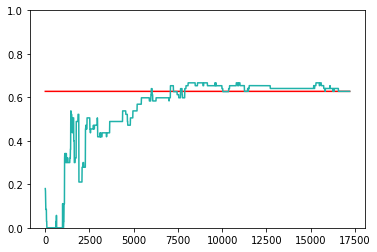

In [45]:
plt.plot(q_r_log, [f1_score_log] * (len(q_r_log)), '-r')
plt.plot(q_r_log, f1score_r_log,'lightseagreen')
plt.ylim(0, 1)

### 1.1.2. Support Vector Machine

In [46]:
alg='svm'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = RandomSampling(trn_ds, method='lc', model=SVM())
model = SVM()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_r_svm, iter_r_svm, f1score_r_svm, tn_r_svm, fp_r_svm,fn_r_svm, tp_r_svm, k_r_svm, trn_dss_r_svm, label_holder_r_svm, asked_id_r_svm = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
898.0281310081482


(0, 1)

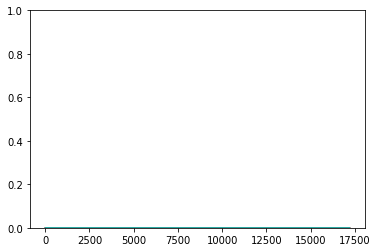

In [47]:
plt.plot(q_r_svm, [f1_score_svm] * (len(q_r_svm)), '-r')
plt.plot(q_r_svm, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)

### 1.1.3. Decision Tree

In [48]:
alg='dt'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(tree.DecisionTreeClassifier())
qs = RandomSampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_r_dt, iter_r_dt, f1score_r_dt, tn_r_dt, fp_r_dt,fn_r_dt, tp_r_dt, k_r_dt, trn_dss_r_dt, label_holder_r_dt, asked_id_r_dt = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.806451612903226
Current progress: 100.0 %
475.6882047653198


(0, 1)

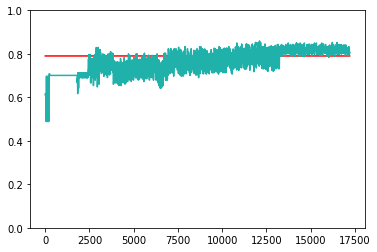

In [49]:
plt.plot(q_r_dt, [f1_score_dt] * (len(q_r_dt)), '-r')
plt.plot(q_r_dt, f1score_r_dt, 'lightseagreen')
plt.ylim(0, 1)

### 1.1.4. Random Forest Regression

In [50]:
alg='rf'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(RandomForestClassifier())
qs = RandomSampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_r_rf, iter_r_rf, f1score_r_rf, tn_r_rf, fp_r_rf,fn_r_rf, tp_r_rf, k_r_rf, trn_dss_r_rf, label_holder_r_rf, asked_id_r_rf = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.7931034482758621
Current progress: 100.0 %
520.627533197403


(0, 1)

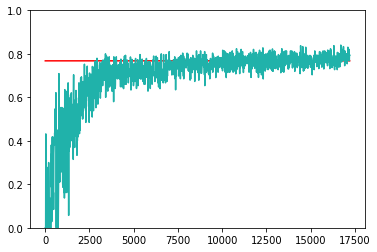

In [51]:
plt.plot(q_r_rf, [f1_score_rf] * (len(q_r_rf)), '-r')
plt.plot(q_r_rf, f1score_r_rf, 'lightseagreen')
plt.ylim(0, 1)

## 1.2. Uncertainity Sampling

In [52]:
q_type='uncertainity'

### 1.2.1. Logistic Regression

In [53]:
alg='log'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = UncertaintySampling(trn_ds, method='lc', model=LogisticRegression())
model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_u_log, iter_u_log, f1score_u_log, tn_u_log, fp_u_log,fn_u_log, tp_u_log, k_u_log, trn_dss_u_log, label_holder_u_log, asked_id_u_log = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.627450980392157
Current progress: 100.0 %
4250.035111904144


(0, 1)

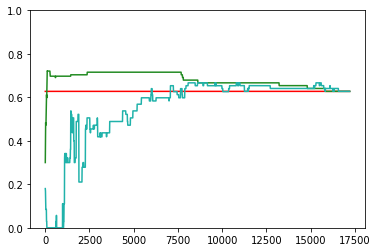

In [54]:
plt.plot(q_u_log, [f1_score_log] * (len(q_u_log)), '-r')
plt.plot(q_u_log, f1score_u_log, 'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)

### 1.2.2. Support Vector Machine

In [55]:
alg='svm'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = UncertaintySampling(trn_ds, method='lc', model=SVM())
model = SVM()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_u_svm, iter_u_svm, f1score_u_svm, tn_u_svm, fp_u_svm,fn_u_svm, tp_u_svm, k_u_svm, trn_dss_u_svm, label_holder_u_svm, asked_id_u_svm = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
8492.279287099838


(0, 1)

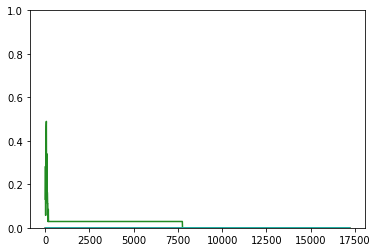

In [56]:
plt.plot(q_u_svm, [f1_score_svm] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_u_svm, 'forestgreen')
plt.plot(q_u_log, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)

### 1.2.3. Decision Tree

In [57]:
alg='dt'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(tree.DecisionTreeClassifier())
qs = UncertaintySampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_u_dt, iter_u_dt, f1score_u_dt, tn_u_dt, fp_u_dt,fn_u_dt, tp_u_dt, k_u_dt, trn_dss_u_dt, label_holder_u_dt, asked_id_u_dt = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8387096774193549
Current progress: 100.0 %
1416.1146728992462


(0, 1)

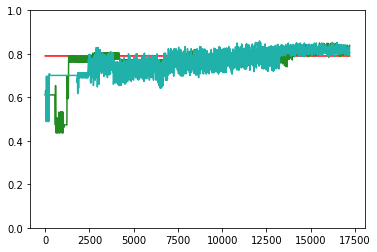

In [58]:
plt.plot(q_u_dt, [f1_score_dt] * (len(q_u_dt)), '-r')
plt.plot(q_u_dt, f1score_u_dt, 'forestgreen')
plt.plot(q_u_log, f1score_r_dt, 'lightseagreen')
plt.ylim(0, 1)

### 1.2.4. Random Forest

In [59]:
alg='rf'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(RandomForestClassifier())
qs = UncertaintySampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_u_rf, iter_u_rf, f1score_u_rf, tn_u_rf, fp_u_rf,fn_u_rf, tp_u_rf, k_u_rf, trn_dss_u_rf, label_holder_u_rf, asked_id_u_rf = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8
Current progress: 100.0 %
1937.1567730903625


(0, 1)

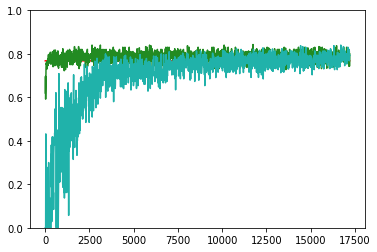

In [60]:
plt.plot(q_u_rf, [f1_score_rf] * (len(q_u_rf)), '-r')
plt.plot(q_u_rf, f1score_u_rf, 'forestgreen')
plt.plot(q_u_log, f1score_r_rf, 'lightseagreen')
plt.ylim(0, 1)

(all plot)

(0, 1)

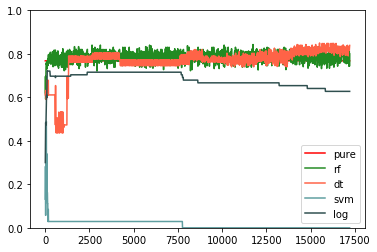

In [61]:
plt.plot(q_u_rf, [f1_score_rf] * (len(q_u_rf)), '-r')
plt.plot(q_u_rf, f1score_u_rf, 'forestgreen')
plt.plot(q_u_rf, f1score_u_dt, 'tomato')
plt.plot(q_u_rf, f1score_u_svm, 'cadetblue')
plt.plot(q_u_rf, f1score_u_log, 'darkslategray')

plt.legend((('pure','rf','dt','svm','log')),loc='lower right')
#plt.gca().legend(('y0','y1'))


plt.ylim(0, 1)

## 1.3. Query by Committee

In [62]:
q_type='qbc'

### 1.3.1. Mix of all the models

In [63]:
alg='mixall'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
    SklearnProbaAdapter(tree.DecisionTreeClassifier()),
    LogisticRegression(),
    SVM(),])

model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_mix, iter_qbc_mix, f1score_qbc_mix, tn_qbc_mix, fp_qbc_mix,fn_qbc_mix, tp_qbc_mix, k_qbc_mix, trn_dss_qbc_mix, label_holder_qbc_mix, asked_id_qbc_mix = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.627450980392157
Current progress: 100.0 %
15324.883836269379


(0, 1)

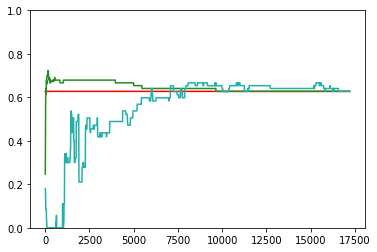

In [64]:
plt.plot(q_qbc_mix, [f1_score_log] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_mix, f1score_qbc_mix, 'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)

### 1.3.2. Only Logistic Regression

In [65]:
alg='onlylog'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
                    LogisticRegression(C=1.0),
                    LogisticRegression(C=0.1),
                ])

model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_log, iter_qbc_log, f1score_qbc_log, tn_qbc_log, fp_qbc_log,fn_qbc_log, tp_qbc_log, k_qbc_log, trn_dss_qbc_log, label_holder_qbc_log, asked_id_qbc_log = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.627450980392157
Current progress: 100.0 %
9207.913831949234


(0, 1)

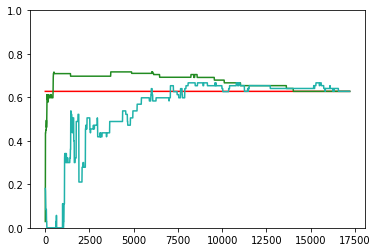

In [66]:
plt.plot(q_qbc_log, [f1_score_log] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_log, f1score_qbc_log,'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)


### 1.3.3. Only Desicion Tree

In [67]:
alg='onlydt'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
                    SklearnProbaAdapter(tree.DecisionTreeClassifier(criterion='gini')),
                    SklearnProbaAdapter(tree.DecisionTreeClassifier(criterion='entropy')),
                ])
model=SklearnProbaAdapter(tree.DecisionTreeClassifier('gini'))
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_dt, iter_qbc_dt, f1score_qbc_dt, tn_qbc_dt, fp_qbc_dt,fn_qbc_dt, tp_qbc_dt, k_qbc_dt, trn_dss_qbc_dt, label_holder_qbc_dt, asked_id_qbc_dt = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8319999999999999
Current progress: 100.0 %
5017.527006864548


(0, 1)

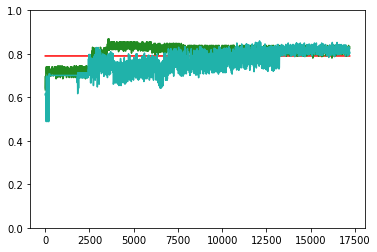

In [68]:
plt.plot(q_qbc_dt, [f1_score_dt] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_dt, f1score_qbc_dt, 'forestgreen')
plt.plot(q_u_log, f1score_r_dt, 'lightseagreen')
plt.ylim(0, 1)

### 1.3.4. Only Support Vector Machine

In [69]:
alg='onlysvm'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
                    SVM(C=1.0),
                    SVM(C=0.1),
                ])

model = SVM()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_svc, iter_qbc_svc, f1score_qbc_svc, tn_qbc_svc, fp_qbc_svc,fn_qbc_svc, tp_qbc_svc, k_qbc_svc, trn_dss_qbc_svc, label_holder_qbc_svc, asked_id_qbc_svc = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
12501.339970111847


(0, 1)

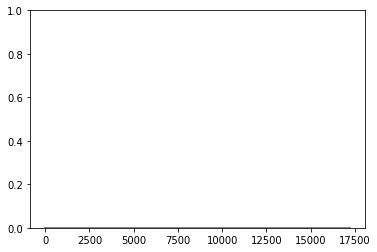

In [70]:
plt.plot(q_qbc_svc, [f1_score_svm] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_svc, f1score_qbc_svc,'forestgreen')
plt.plot(q_u_log, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)

(all plot)

(0, 1)

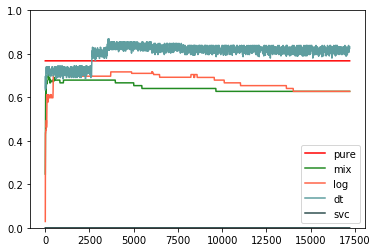

In [71]:
plt.plot(q_u_rf, [f1_score_rf] * (len(q_u_rf)), '-r')
plt.plot(q_u_rf, f1score_qbc_mix, 'forestgreen')
plt.plot(q_u_rf, f1score_qbc_log, 'tomato')
plt.plot(q_u_rf, f1score_qbc_dt, 'cadetblue')
plt.plot(q_u_rf, f1score_qbc_svc, 'darkslategray')

plt.legend((('pure','mix','log','dt','svc')),loc='lower right')
#plt.gca().legend(('y0','y1'))


plt.ylim(0, 1)

# 2. USING ONLY LEVENSTEIN

In [72]:
cols = lev_columns_el.copy()

- Modeling Parameters

In [73]:
# take all the columns
p_result_nomiss_jac=df2[cols_all]
# do train, test split
X_train, X_test, y_train, y_test = train_test_split(p_result_nomiss_jac.drop('match',axis=1).values,p_result_nomiss_jac['match'].values,test_size=0.33,random_state=42)
seed=10
# get the seeds from clusters
samp=get_seed_cluster(y_train, X_train, seed)[0]

# filter the train and test according to its columns
X_train = np.array(pd.DataFrame(X_train).iloc[:,get_columns(cols_all, cols)])
X_test = np.array(pd.DataFrame(X_test).iloc[:,get_columns(cols_all, cols)])

trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
tst_ds = Dataset(X_test, y_test)


In [74]:
run_=10
missing_option='opt4'
features='onlylev'

- Model Results (pure)

In [75]:
from sklearn.linear_model import LogisticRegression as ls 
f1_score_log, tn_log, fp_log, fn_log, tp_log = get_base_model_result(y_test, y_train, X_test, X_train, ls())
print(f1_score_log)
print(tn_log)
print(fp_log)
print(fn_log)
print(tp_log)

0.13698630136986303
8407
0
63
5


In [76]:
from sklearn.svm import SVC as support_vector
f1_score_svm, tn_svm, fp_svm, fn_svm, tp_svm = get_base_model_result(y_test, y_train, X_test, X_train, support_vector())
print(f1_score_svm)
print(tn_svm)
print(fp_svm)
print(fn_svm)
print(tp_svm)

0.0
8407
0
68
0


In [77]:
from sklearn import tree
f1_score_dt, tn_dt, fp_dt, fn_dt, tp_dt = get_base_model_result(y_test, y_train, X_test, X_train, tree.DecisionTreeClassifier())
print(f1_score_dt)
print(tn_dt)
print(fp_dt)
print(fn_dt)
print(tp_dt)

0.8319999999999999
8402
5
16
52


In [78]:
f1_score_rf, tn_rf, fp_rf, fn_rf, tp_rf = get_base_model_result(y_test, y_train, X_test, X_train, RandomForestClassifier())
print(f1_score_rf)
print(tn_rf)
print(fp_rf)
print(fn_rf)
print(tp_rf)

0.7931034482758621
8405
2
22
46


## 2.1. Random Sampling

In [79]:
q_type='random'

## 2.1.1. Logistic Regression

In [80]:
alg='log'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = RandomSampling(trn_ds, method='lc', model=LogisticRegression())
model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_r_log, iter_r_log, f1score_r_log, tn_r_log, fp_r_log,fn_r_log, tp_r_log, k_r_log, trn_dss_r_log, label_holder_r_log, asked_id_r_log = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)


17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.13698630136986303
Current progress: 100.0 %
767.6938631534576


(0, 1)

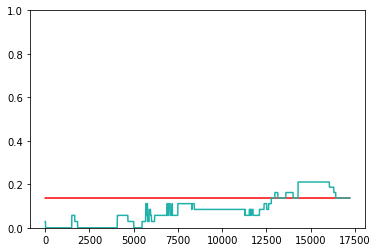

In [81]:
plt.plot(q_u_svm, [f1_score_log] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_r_log,'lightseagreen')
plt.ylim(0, 1)

## 2.1.2. Support Vector Machines

In [82]:
alg='svm'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = RandomSampling(trn_ds, method='lc', model=SVM())
model = SVM()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_r_svm, iter_r_svm, f1score_r_svm, tn_r_svm, fp_r_svm,fn_r_svm, tp_r_svm, k_r_svm, trn_dss_r_svm, label_holder_r_svm, asked_id_r_svm = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)


17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
968.3376913070679


(0, 1)

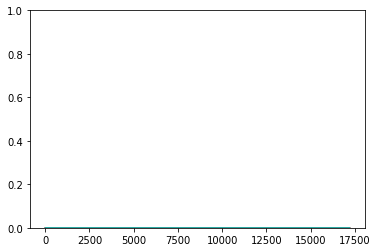

In [83]:
plt.plot(q_u_svm, [f1_score_svm] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)


## 2.1.3. Decision Trees

In [84]:
alg='dt'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(tree.DecisionTreeClassifier())
qs = RandomSampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_r_dt, iter_r_dt, f1score_r_dt, tn_r_dt, fp_r_dt,fn_r_dt, tp_r_dt, k_r_dt, trn_dss_r_dt, label_holder_r_dt, asked_id_r_dt = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)


17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8292682926829268
Current progress: 100.0 %
499.39621019363403


(0, 1)

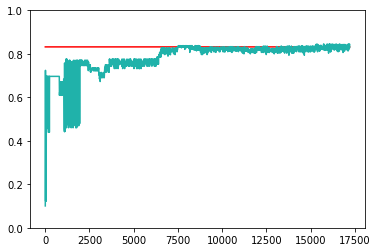

In [85]:
plt.plot(q_u_svm, [f1_score_dt] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_r_dt, 'lightseagreen')
plt.ylim(0, 1)


## 2.1.4. Random Forest Regression

In [86]:
alg='rf'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(RandomForestClassifier())
qs = RandomSampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_r_rf, iter_r_rf, f1score_r_rf, tn_r_rf, fp_r_rf,fn_r_rf, tp_r_rf, k_r_rf, trn_dss_r_rf, label_holder_r_rf, asked_id_r_rf = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)


17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.7787610619469026
Current progress: 100.0 %
527.185949087143


(0, 1)

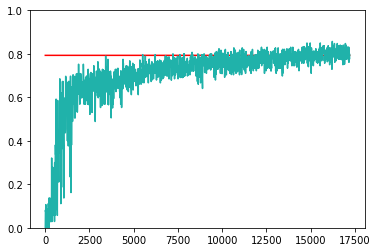

In [87]:
plt.plot(q_u_svm, [f1_score_rf] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_r_rf, 'lightseagreen')
plt.ylim(0, 1)

## 2.2. Uncertainity Sampling

In [88]:
q_type='uncertainity'

### 2.2.1. Logistic Regression

In [89]:
alg='log'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = UncertaintySampling(trn_ds, method='lc', model=LogisticRegression())
model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_u_log, iter_u_log, f1score_u_log, tn_u_log, fp_u_log,fn_u_log, tp_u_log, k_u_log, trn_dss_u_log, label_holder_u_log, asked_id_u_log = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.13698630136986303
Current progress: 100.0 %
5064.738291978836


(0, 1)

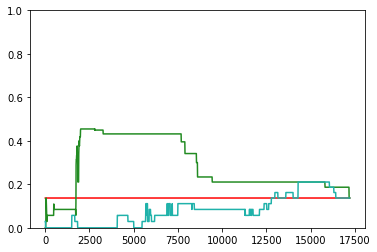

In [90]:
plt.plot(q_u_log, [f1_score_log] * (len(q_u_log)), '-r')
plt.plot(q_u_log, f1score_u_log, 'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)

### 2.2.2. Support Vector Machine

In [91]:
alg='svm'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = UncertaintySampling(trn_ds, method='lc', model=SVM())
model = SVM()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_u_svm, iter_u_svm, f1score_u_svm, tn_u_svm, fp_u_svm,fn_u_svm, tp_u_svm, k_u_svm, trn_dss_u_svm, label_holder_u_svm, asked_id_u_svm = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
8042.235373735428


(0, 1)

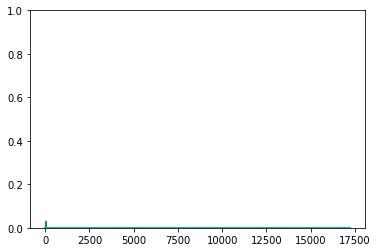

In [92]:
plt.plot(q_u_svm, [f1_score_svm] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_u_svm, 'forestgreen')
plt.plot(q_u_log, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)

### 2.2.3. Decision Tree

In [93]:
alg='dt'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(tree.DecisionTreeClassifier())
qs = UncertaintySampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_u_dt, iter_u_dt, f1score_u_dt, tn_u_dt, fp_u_dt,fn_u_dt, tp_u_dt, k_u_dt, trn_dss_u_dt, label_holder_u_dt, asked_id_u_dt = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8429752066115702
Current progress: 100.0 %
1526.5668988227844


(0, 1)

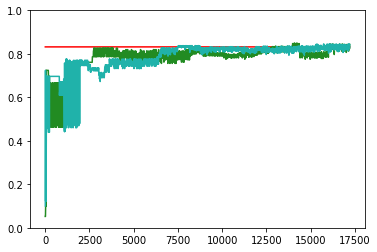

In [94]:
plt.plot(q_u_dt, [f1_score_dt] * (len(q_u_dt)), '-r')
plt.plot(q_u_dt, f1score_u_dt, 'forestgreen')
plt.plot(q_u_log, f1score_r_dt, 'lightseagreen')
plt.ylim(0, 1)

### 2.2.4. Random Forest

In [95]:
alg='rf'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(RandomForestClassifier())
qs = UncertaintySampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_u_rf, iter_u_rf, f1score_u_rf, tn_u_rf, fp_u_rf,fn_u_rf, tp_u_rf, k_u_rf, trn_dss_u_rf, label_holder_u_rf, asked_id_u_rf = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8403361344537814
Current progress: 100.0 %
2065.105234861374


(0, 1)

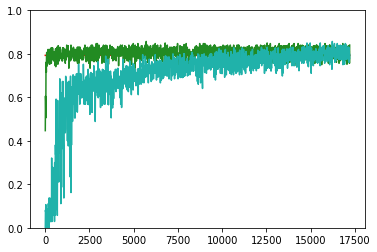

In [96]:

plt.plot(q_u_rf, [f1_score_rf] * (len(q_u_rf)), '-r')
plt.plot(q_u_rf, f1score_u_rf, 'forestgreen')
plt.plot(q_u_log, f1score_r_rf, 'lightseagreen')
plt.ylim(0, 1)

(all models)

(0, 1)

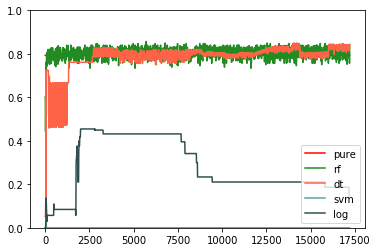

In [97]:
plt.plot(q_u_rf, [f1_score_rf] * (len(q_u_rf)), '-r')
plt.plot(q_u_rf, f1score_u_rf, 'forestgreen')
plt.plot(q_u_rf, f1score_u_dt, 'tomato')
plt.plot(q_u_rf, f1score_u_svm, 'cadetblue')
plt.plot(q_u_rf, f1score_u_log, 'darkslategray')

plt.legend((('pure','rf','dt','svm','log')),loc='lower right')
#plt.gca().legend(('y0','y1'))
plt.ylim(0, 1)

## 2.3. Query by Committee

In [98]:
q_type='qbc'

### 2.3.1. Mix of all the models

In [99]:
alg='mixall'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
    SklearnProbaAdapter(tree.DecisionTreeClassifier()),
    LogisticRegression(),
    SVM(),])

model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_mix, iter_qbc_mix, f1score_qbc_mix, tn_qbc_mix, fp_qbc_mix,fn_qbc_mix, tp_qbc_mix, k_qbc_mix, trn_dss_qbc_mix, label_holder_qbc_mix, asked_id_qbc_mix = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.13698630136986303
Current progress: 100.0 %
25296.77322292328


(0, 1)

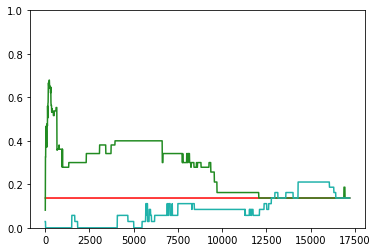

In [100]:
plt.plot(q_qbc_mix, [f1_score_log] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_mix, f1score_qbc_mix, 'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)

### 2.3.2. Only Logistic Regression

In [101]:
alg='onlylog'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
                    LogisticRegression(C=1.0),
                    LogisticRegression(C=0.1),
                ])

model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_log, iter_qbc_log, f1score_qbc_log, tn_qbc_log, fp_qbc_log,fn_qbc_log, tp_qbc_log, k_qbc_log, trn_dss_qbc_log, label_holder_qbc_log, asked_id_qbc_log = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.13698630136986303
Current progress: 100.0 %
11003.10733294487


(0, 1)

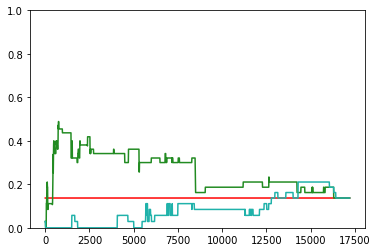

In [102]:
plt.plot(q_qbc_log, [f1_score_log] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_log, f1score_qbc_log,'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)


### 2.3.3. Only Desicion Tree

In [103]:
alg='onlydt'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
                    SklearnProbaAdapter(tree.DecisionTreeClassifier(criterion='gini')),
                    SklearnProbaAdapter(tree.DecisionTreeClassifier(criterion='entropy')),
                ])
model=SklearnProbaAdapter(tree.DecisionTreeClassifier('gini'))
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_dt, iter_qbc_dt, f1score_qbc_dt, tn_qbc_dt, fp_qbc_dt,fn_qbc_dt, tp_qbc_dt, k_qbc_dt, trn_dss_qbc_dt, label_holder_qbc_dt, asked_id_qbc_dt = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8125
Current progress: 100.0 %
4990.399081945419


(0, 1)

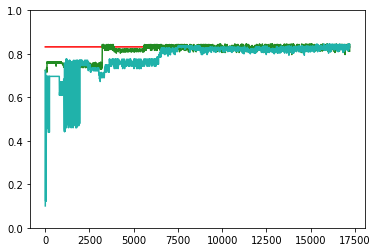

In [104]:
plt.plot(q_qbc_dt, [f1_score_dt] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_dt, f1score_qbc_dt, 'forestgreen')
plt.plot(q_u_log, f1score_r_dt, 'lightseagreen')
plt.ylim(0, 1)

### 2.3.4. Only Support Vector Machine

In [105]:
alg='onlysvm'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
                    SVM(C=1.0),
                    SVM(C=0.1),
                ])

model = SVM()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_svc, iter_qbc_svc, f1score_qbc_svc, tn_qbc_svc, fp_qbc_svc,fn_qbc_svc, tp_qbc_svc, k_qbc_svc, trn_dss_qbc_svc, label_holder_qbc_svc, asked_id_qbc_svc = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
14119.896535158157


(0, 1)

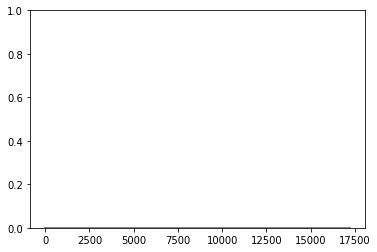

In [106]:
plt.plot(q_qbc_svc, [f1_score_svm] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_svc, f1score_qbc_svc,'forestgreen')
plt.plot(q_u_log, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)

(all models)

(0, 1)

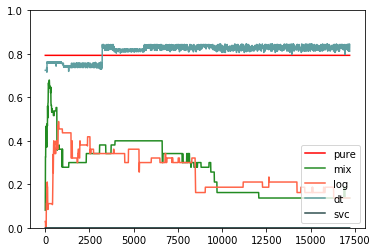

In [107]:
plt.plot(q_u_rf, [f1_score_rf] * (len(q_u_rf)), '-r')
plt.plot(q_u_rf, f1score_qbc_mix, 'forestgreen')
plt.plot(q_u_rf, f1score_qbc_log, 'tomato')
plt.plot(q_u_rf, f1score_qbc_dt, 'cadetblue')
plt.plot(q_u_rf, f1score_qbc_svc, 'darkslategray')

plt.legend((('pure','mix','log','dt','svc')),loc='lower right')
#plt.gca().legend(('y0','y1'))


plt.ylim(0, 1)

# 3. USING ONLY JARO-WINKLER

In [108]:
cols = jaro_columns_el.copy()

- Modeling Parameters

In [109]:
# take all the columns
p_result_nomiss_jac=df2[cols_all]
# do train, test split
X_train, X_test, y_train, y_test = train_test_split(p_result_nomiss_jac.drop('match',axis=1).values,p_result_nomiss_jac['match'].values,test_size=0.33,random_state=42)
seed=10
# get the seeds from clusters
samp=get_seed_cluster(y_train, X_train, seed)[0]

# filter the train and test according to its columns
X_train = np.array(pd.DataFrame(X_train).iloc[:,get_columns(cols_all, cols)])
X_test = np.array(pd.DataFrame(X_test).iloc[:,get_columns(cols_all, cols)])

trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
tst_ds = Dataset(X_test, y_test)

In [110]:
run_=10
missing_option='opt4'
features='onlyjaro'

- Model Results (pure)

In [111]:
from sklearn.linear_model import LogisticRegression as ls 
f1_score_log, tn_log, fp_log, fn_log, tp_log = get_base_model_result(y_test, y_train, X_test, X_train, ls())
print(f1_score_log)
print(tn_log)
print(fp_log)
print(fn_log)
print(tp_log)

0.0
8407
0
68
0


In [112]:
from sklearn.svm import SVC as support_vector
f1_score_svm, tn_svm, fp_svm, fn_svm, tp_svm = get_base_model_result(y_test, y_train, X_test, X_train, support_vector())
print(f1_score_svm)
print(tn_svm)
print(fp_svm)
print(fn_svm)
print(tp_svm)

0.0
8407
0
68
0


In [113]:
from sklearn import tree
f1_score_dt, tn_dt, fp_dt, fn_dt, tp_dt = get_base_model_result(y_test, y_train, X_test, X_train, tree.DecisionTreeClassifier())
print(f1_score_dt)
print(tn_dt)
print(fp_dt)
print(fn_dt)
print(tp_dt)

0.8264462809917356
8404
3
18
50


In [114]:
f1_score_rf, tn_rf, fp_rf, fn_rf, tp_rf = get_base_model_result(y_test, y_train, X_test, X_train, RandomForestClassifier())
print(f1_score_rf)
print(tn_rf)
print(fp_rf)
print(fn_rf)
print(tp_rf)


0.7454545454545454
8406
1
27
41


## 3.1. Random Sampling

In [115]:
q_type='random'

### 3.1.1. Logistic Regression

In [116]:
alg='log'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = RandomSampling(trn_ds, method='lc', model=LogisticRegression())
model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_r_log, iter_r_log, f1score_r_log, tn_r_log, fp_r_log,fn_r_log, tp_r_log, k_r_log, trn_dss_r_log, label_holder_r_log, asked_id_r_log = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)


17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
807.4883382320404


(0, 1)

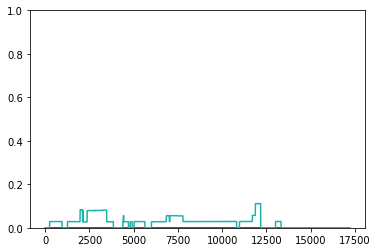

In [117]:
plt.plot(q_u_svm, [f1_score_log] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_r_log,'lightseagreen')
plt.ylim(0, 1)


### 3.1.2. Support Vector Machine

In [118]:
alg='svm'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = RandomSampling(trn_ds, method='lc', model=SVM())
model = SVM()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_r_svm, iter_r_svm, f1score_r_svm, tn_r_svm, fp_r_svm,fn_r_svm, tp_r_svm, k_r_svm, trn_dss_r_svm, label_holder_r_svm, asked_id_r_svm = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
1017.6518778800964


(0, 1)

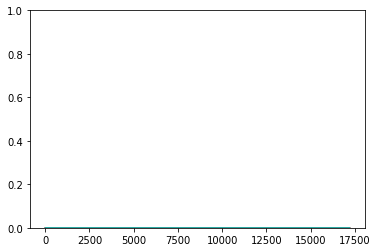

In [119]:
plt.plot(q_u_svm, [f1_score_svm] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)


### 3.1.3. Decision Tree

In [120]:
alg='dt'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(tree.DecisionTreeClassifier())
qs = RandomSampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_r_dt, iter_r_dt, f1score_r_dt, tn_r_dt, fp_r_dt,fn_r_dt, tp_r_dt, k_r_dt, trn_dss_r_dt, label_holder_r_dt, asked_id_r_dt = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)


17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8319999999999999
Current progress: 100.0 %
509.7822608947754


(0, 1)

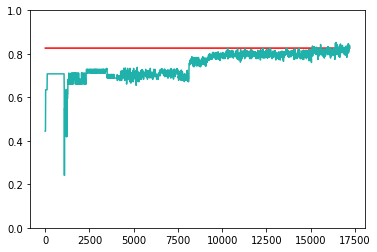

In [121]:
plt.plot(q_u_svm, [f1_score_dt] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_r_dt, 'lightseagreen')
plt.ylim(0, 1)


### 3.1.4. Random Forest

In [122]:
alg='rf'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(RandomForestClassifier())
qs = RandomSampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_r_rf, iter_r_rf, f1score_r_rf, tn_r_rf, fp_r_rf,fn_r_rf, tp_r_rf, k_r_rf, trn_dss_r_rf, label_holder_r_rf, asked_id_r_rf = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)


17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.7339449541284403
Current progress: 100.0 %
540.8624529838562


(0, 1)

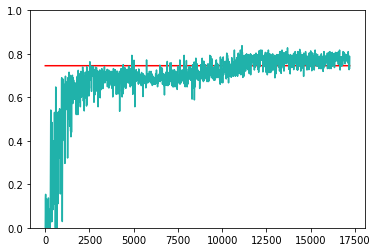

In [123]:
plt.plot(q_u_svm, [f1_score_rf] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_r_rf, 'lightseagreen')
plt.ylim(0, 1)


## 3.2. Uncertainity Sampling

In [124]:
q_type='uncertainity'

### 3.2.1. Logistic Regression

In [125]:
alg='log'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = UncertaintySampling(trn_ds, method='lc', model=LogisticRegression())
model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_u_log, iter_u_log, f1score_u_log, tn_u_log, fp_u_log,fn_u_log, tp_u_log, k_u_log, trn_dss_u_log, label_holder_u_log, asked_id_u_log = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
5231.3359208106995


(0, 1)

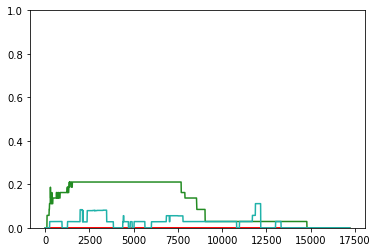

In [126]:
plt.plot(q_u_log, [f1_score_log] * (len(q_u_log)), '-r')
plt.plot(q_u_log, f1score_u_log, 'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)

### 3.2.2. Support Vector Machine

In [127]:
alg='svm'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = UncertaintySampling(trn_ds, method='lc', model=SVM())
model = SVM()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_u_svm, iter_u_svm, f1score_u_svm, tn_u_svm, fp_u_svm,fn_u_svm, tp_u_svm, k_u_svm, trn_dss_u_svm, label_holder_u_svm, asked_id_u_svm = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
9163.160244941711


(0, 1)

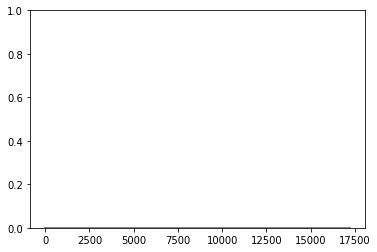

In [128]:
plt.plot(q_u_svm, [f1_score_svm] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_u_svm, 'forestgreen')
plt.plot(q_u_log, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)

### 3.2.3. Decision Tree

In [129]:
alg='dt'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(tree.DecisionTreeClassifier())
qs = UncertaintySampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_u_dt, iter_u_dt, f1score_u_dt, tn_u_dt, fp_u_dt,fn_u_dt, tp_u_dt, k_u_dt, trn_dss_u_dt, label_holder_u_dt, asked_id_u_dt = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8360655737704917
Current progress: 100.0 %
1591.2641956806183


(0, 1)

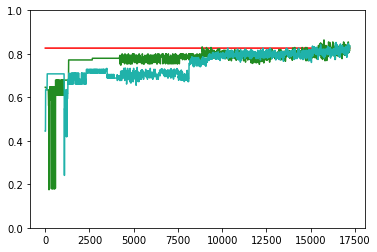

In [130]:
plt.plot(q_u_dt, [f1_score_dt] * (len(q_u_dt)), '-r')
plt.plot(q_u_dt, f1score_u_dt, 'forestgreen')
plt.plot(q_u_log, f1score_r_dt, 'lightseagreen')
plt.ylim(0, 1)

### 3.2.4. Random Forest

In [131]:
alg='rf'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(RandomForestClassifier())
qs = UncertaintySampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_u_rf, iter_u_rf, f1score_u_rf, tn_u_rf, fp_u_rf,fn_u_rf, tp_u_rf, k_u_rf, trn_dss_u_rf, label_holder_u_rf, asked_id_u_rf = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.7894736842105263
Current progress: 100.0 %
2135.7106087207794


(0, 1)

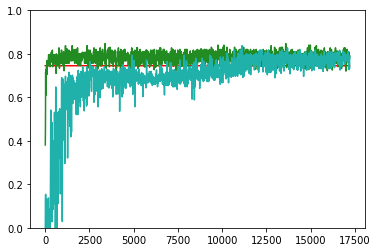

In [132]:
plt.plot(q_u_rf, [f1_score_rf] * (len(q_u_rf)), '-r')
plt.plot(q_u_rf, f1score_u_rf, 'forestgreen')
plt.plot(q_u_log, f1score_r_rf, 'lightseagreen')
plt.ylim(0, 1)


(all models)

(0, 1)

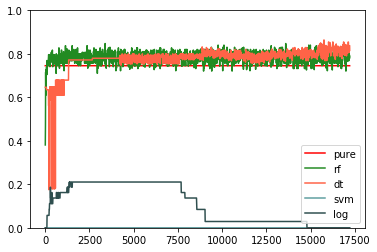

In [133]:
plt.plot(q_u_rf, [f1_score_rf] * (len(q_u_rf)), '-r')
plt.plot(q_u_rf, f1score_u_rf, 'forestgreen')
plt.plot(q_u_rf, f1score_u_dt, 'tomato')
plt.plot(q_u_rf, f1score_u_svm, 'cadetblue')
plt.plot(q_u_rf, f1score_u_log, 'darkslategray')

plt.legend((('pure','rf','dt','svm','log')),loc='lower right')
#plt.gca().legend(('y0','y1'))
plt.ylim(0, 1)

## 3.3. Query by Committee

In [134]:
q_type='qbc'

### 3.3.1. Mix of all the models

In [135]:
alg='mixall'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
    SklearnProbaAdapter(tree.DecisionTreeClassifier()),
    LogisticRegression(),
    SVM(),])

model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_mix, iter_qbc_mix, f1score_qbc_mix, tn_qbc_mix, fp_qbc_mix,fn_qbc_mix, tp_qbc_mix, k_qbc_mix, trn_dss_qbc_mix, label_holder_qbc_mix, asked_id_qbc_mix = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
17630.606676101685


(0, 1)

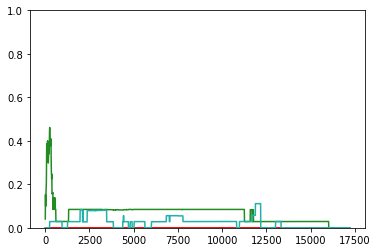

In [136]:
plt.plot(q_qbc_mix, [f1_score_log] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_mix, f1score_qbc_mix, 'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)

### 3.3.2. Only Logistic Regression

In [137]:
alg='onlylog'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
                    LogisticRegression(C=1.0),
                    LogisticRegression(C=0.1),
                ])

model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_log, iter_qbc_log, f1score_qbc_log, tn_qbc_log, fp_qbc_log,fn_qbc_log, tp_qbc_log, k_qbc_log, trn_dss_qbc_log, label_holder_qbc_log, asked_id_qbc_log = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
10530.956586122513


(0, 1)

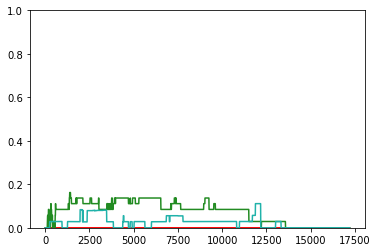

In [138]:
plt.plot(q_qbc_log, [f1_score_log] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_log, f1score_qbc_log,'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)


### 3.3.3. Only Desicion Tree

In [139]:
alg='onlydt'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
                    SklearnProbaAdapter(tree.DecisionTreeClassifier(criterion='gini')),
                    SklearnProbaAdapter(tree.DecisionTreeClassifier(criterion='entropy')),
                ])
model=SklearnProbaAdapter(tree.DecisionTreeClassifier('gini'))
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_dt, iter_qbc_dt, f1score_qbc_dt, tn_qbc_dt, fp_qbc_dt,fn_qbc_dt, tp_qbc_dt, k_qbc_dt, trn_dss_qbc_dt, label_holder_qbc_dt, asked_id_qbc_dt = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8548387096774193
Current progress: 100.0 %
4352.538944005966


(0, 1)

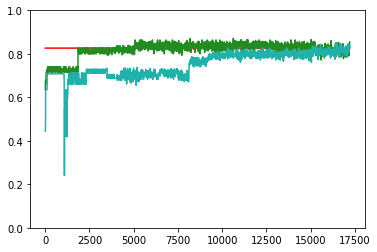

In [140]:
plt.plot(q_qbc_dt, [f1_score_dt] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_dt, f1score_qbc_dt, 'forestgreen')
plt.plot(q_u_log, f1score_r_dt, 'lightseagreen')
plt.ylim(0, 1)

### 3.3.4. Only Support Vector Machine

In [141]:
alg='onlysvm'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
                    SVM(C=1.0),
                    SVM(C=0.1),
                ])

model = SVM()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_svc, iter_qbc_svc, f1score_qbc_svc, tn_qbc_svc, fp_qbc_svc,fn_qbc_svc, tp_qbc_svc, k_qbc_svc, trn_dss_qbc_svc, label_holder_qbc_svc, asked_id_qbc_svc = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
14411.3979139328


(0, 1)

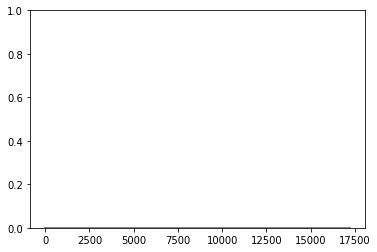

In [142]:
plt.plot(q_qbc_svc, [f1_score_svm] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_svc, f1score_qbc_svc,'forestgreen')
plt.plot(q_u_log, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)

(all models)

(0, 1)

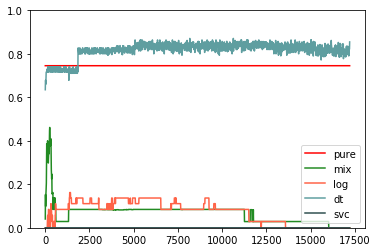

In [143]:
plt.plot(q_u_rf, [f1_score_rf] * (len(q_u_rf)), '-r')
plt.plot(q_u_rf, f1score_qbc_mix, 'forestgreen')
plt.plot(q_u_rf, f1score_qbc_log, 'tomato')
plt.plot(q_u_rf, f1score_qbc_dt, 'cadetblue')
plt.plot(q_u_rf, f1score_qbc_svc, 'darkslategray')

plt.legend((('pure','mix','log','dt','svc')),loc='lower right')
#plt.gca().legend(('y0','y1'))


plt.ylim(0, 1)

# 4. ALL FEATURES

In [144]:
run_=10
missing_option='opt4'
features='all'

In [145]:
# take all the columns
p_result_nomiss_jac=df2[cols_all]
# do train, test split
X_train, X_test, y_train, y_test = train_test_split(p_result_nomiss_jac.drop('match',axis=1).values,p_result_nomiss_jac['match'].values,test_size=0.33,random_state=42)
seed=10
# get the seeds from clusters
samp=get_seed_cluster(y_train, X_train, seed)[0]

trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
tst_ds = Dataset(X_test, y_test)


- Model Results (pure)

In [146]:
from sklearn.linear_model import LogisticRegression as ls 
f1_score_log, tn_log, fp_log, fn_log, tp_log = get_base_model_result(y_test, y_train, X_test, X_train, ls())
print(f1_score_log)
print(tn_log)
print(fp_log)
print(fn_log)
print(tp_log)

0.7169811320754718
8407
0
30
38


In [147]:
from sklearn.svm import SVC as support_vector
f1_score_svm, tn_svm, fp_svm, fn_svm, tp_svm = get_base_model_result(y_test, y_train, X_test, X_train, support_vector())
print(f1_score_svm)
print(tn_svm)
print(fp_svm)
print(fn_svm)
print(tp_svm)

0.0
8407
0
68
0


In [148]:
from sklearn import tree
f1_score_dt, tn_dt, fp_dt, fn_dt, tp_dt = get_base_model_result(y_test, y_train, X_test, X_train, tree.DecisionTreeClassifier())
print(f1_score_dt)
print(tn_dt)
print(fp_dt)
print(fn_dt)
print(tp_dt)

0.8455284552845528
8404
3
16
52


In [149]:
f1_score_rf, tn_rf, fp_rf, fn_rf, tp_rf = get_base_model_result(y_test, y_train, X_test, X_train, RandomForestClassifier())
print(f1_score_rf)
print(tn_rf)
print(fp_rf)
print(fn_rf)
print(tp_rf)

0.8067226890756304
8404
3
20
48


## 4.1. Random Sampling

In [150]:
q_type='random'

## 4.1.1. Logistic Regression

In [151]:
alg='log'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = RandomSampling(trn_ds, method='lc', model=LogisticRegression())
model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_r_log, iter_r_log, f1score_r_log, tn_r_log, fp_r_log,fn_r_log, tp_r_log, k_r_log, trn_dss_r_log, label_holder_r_log, asked_id_r_log = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)


17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.7169811320754718
Current progress: 100.0 %
1389.1367588043213


(0, 1)

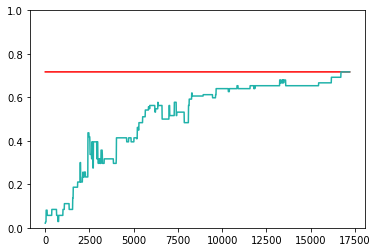

In [152]:
plt.plot(q_u_svm, [f1_score_log] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_r_log,'lightseagreen')
plt.ylim(0, 1)

## 4.1.2. Support Vector Machines

In [153]:
alg='svm'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = RandomSampling(trn_ds, method='lc', model=SVM())
model = SVM()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_r_svm, iter_r_svm, f1score_r_svm, tn_r_svm, fp_r_svm,fn_r_svm, tp_r_svm, k_r_svm, trn_dss_r_svm, label_holder_r_svm, asked_id_r_svm = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)


17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
1783.272374868393


(0, 1)

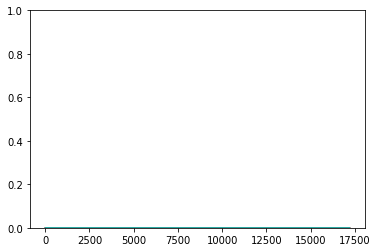

In [154]:
plt.plot(q_u_svm, [f1_score_svm] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)


## 4.1.3. Decision Trees

In [155]:
alg='dt'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(tree.DecisionTreeClassifier())
qs = RandomSampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_r_dt, iter_r_dt, f1score_r_dt, tn_r_dt, fp_r_dt,fn_r_dt, tp_r_dt, k_r_dt, trn_dss_r_dt, label_holder_r_dt, asked_id_r_dt = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)


17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.7967479674796749
Current progress: 100.0 %
886.646311044693


(0, 1)

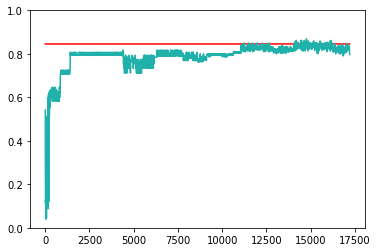

In [156]:
plt.plot(q_u_svm, [f1_score_dt] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_r_dt, 'lightseagreen')
plt.ylim(0, 1)


## 4.1.4. Random Forest Regression

In [157]:
alg='rf'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(RandomForestClassifier())
qs = RandomSampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_r_rf, iter_r_rf, f1score_r_rf, tn_r_rf, fp_r_rf,fn_r_rf, tp_r_rf, k_r_rf, trn_dss_r_rf, label_holder_r_rf, asked_id_r_rf = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)


17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8499999999999999
Current progress: 100.0 %
755.5108931064606


(0, 1)

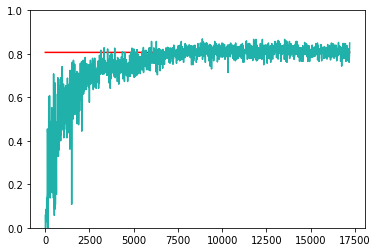

In [158]:
plt.plot(q_u_svm, [f1_score_rf] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_r_rf, 'lightseagreen')
plt.ylim(0, 1)

## 4.2. Uncertainity Sampling

In [159]:
q_type='uncertainity'

### 4.2.1. Logistic Regression

In [160]:
alg='log'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = UncertaintySampling(trn_ds, method='lc', model=LogisticRegression())
model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_u_log, iter_u_log, f1score_u_log, tn_u_log, fp_u_log,fn_u_log, tp_u_log, k_u_log, trn_dss_u_log, label_holder_u_log, asked_id_u_log = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.7169811320754718
Current progress: 100.0 %
13569.015143871307


(0, 1)

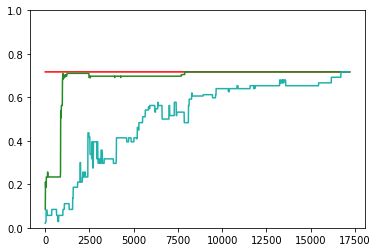

In [161]:
plt.plot(q_u_log, [f1_score_log] * (len(q_u_log)), '-r')
plt.plot(q_u_log, f1score_u_log, 'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)

### 4.2.2. Support Vector Machine

In [162]:
alg='svm'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = UncertaintySampling(trn_ds, method='lc', model=SVM())
model = SVM()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_u_svm, iter_u_svm, f1score_u_svm, tn_u_svm, fp_u_svm,fn_u_svm, tp_u_svm, k_u_svm, trn_dss_u_svm, label_holder_u_svm, asked_id_u_svm = run_faster(trn_ds, tst_ds, y_train, model, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
19840.235714912415


(0, 1)

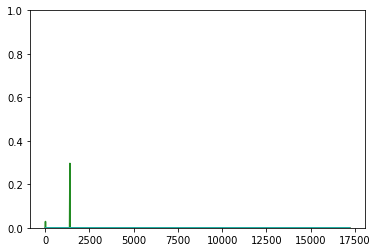

In [163]:
plt.plot(q_u_svm, [f1_score_svm] * (len(q_u_log)), '-r')
plt.plot(q_u_svm, f1score_u_svm, 'forestgreen')
plt.plot(q_u_log, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)

### 4.2.3. Decision Tree

In [164]:
alg='dt'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(tree.DecisionTreeClassifier())
qs = UncertaintySampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_u_dt, iter_u_dt, f1score_u_dt, tn_u_dt, fp_u_dt,fn_u_dt, tp_u_dt, k_u_dt, trn_dss_u_dt, label_holder_u_dt, asked_id_u_dt = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.806451612903226
Current progress: 100.0 %
4206.07843208313


(0, 1)

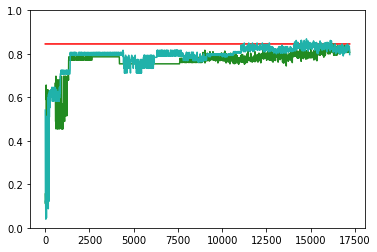

In [165]:
plt.plot(q_u_dt, [f1_score_dt] * (len(q_u_dt)), '-r')
plt.plot(q_u_dt, f1score_u_dt, 'forestgreen')
plt.plot(q_u_log, f1score_r_dt, 'lightseagreen')
plt.ylim(0, 1)

### 4.2.4. Random Forest

In [166]:
alg='rf'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
model_dec=SklearnProbaAdapter(RandomForestClassifier())
qs = UncertaintySampling(trn_ds, method='lc', model=model_dec)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
q_u_rf, iter_u_rf, f1score_u_rf, tn_u_rf, fp_u_rf,fn_u_rf, tp_u_rf, k_u_rf, trn_dss_u_rf, label_holder_u_rf, asked_id_u_rf = run_faster(trn_ds, tst_ds, y_train, model_dec, qs, X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8
Current progress: 100.0 %
3489.9651758670807


(0, 1)

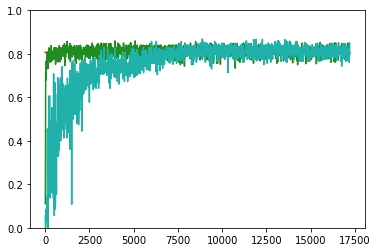

In [167]:

plt.plot(q_u_rf, [f1_score_rf] * (len(q_u_rf)), '-r')
plt.plot(q_u_rf, f1score_u_rf, 'forestgreen')
plt.plot(q_u_log, f1score_r_rf, 'lightseagreen')
plt.ylim(0, 1)

(all models)

(0, 1)

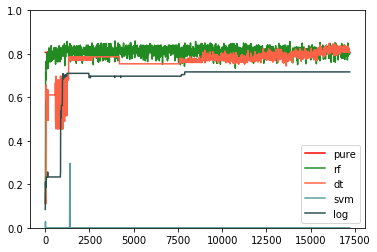

In [168]:
plt.plot(q_u_rf, [f1_score_rf] * (len(q_u_rf)), '-r')
plt.plot(q_u_rf, f1score_u_rf, 'forestgreen')
plt.plot(q_u_rf, f1score_u_dt, 'tomato')
plt.plot(q_u_rf, f1score_u_svm, 'cadetblue')
plt.plot(q_u_rf, f1score_u_log, 'darkslategray')

plt.legend((('pure','rf','dt','svm','log')),loc='lower right')
#plt.gca().legend(('y0','y1'))
plt.ylim(0, 1)

## 4.3. Query by Committee

In [169]:
q_type='qbc'

### 4.3.1. Mix of all the models

In [170]:
alg='mixall'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
    SklearnProbaAdapter(tree.DecisionTreeClassifier()),
    LogisticRegression(),
    SVM(),])

model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_mix, iter_qbc_mix, f1score_qbc_mix, tn_qbc_mix, fp_qbc_mix,fn_qbc_mix, tp_qbc_mix, k_qbc_mix, trn_dss_qbc_mix, label_holder_qbc_mix, asked_id_qbc_mix = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.7169811320754718
Current progress: 100.0 %
37641.28268122673


(0, 1)

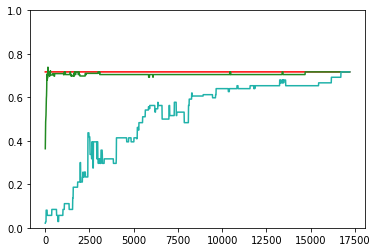

In [171]:
plt.plot(q_qbc_mix, [f1_score_log] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_mix, f1score_qbc_mix, 'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)

### 4.3.2. Only Logistic Regression

In [172]:
alg='onlylog'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
                    LogisticRegression(C=1.0),
                    LogisticRegression(C=0.1),
                ])

model = LogisticRegression()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_log, iter_qbc_log, f1score_qbc_log, tn_qbc_log, fp_qbc_log,fn_qbc_log, tp_qbc_log, k_qbc_log, trn_dss_qbc_log, label_holder_qbc_log, asked_id_qbc_log = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.7169811320754718
Current progress: 100.0 %
22143.54304599762


(0, 1)

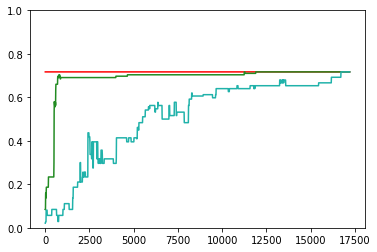

In [173]:
plt.plot(q_qbc_log, [f1_score_log] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_log, f1score_qbc_log,'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)


### 4.3.3. Only Desicion Tree

In [174]:
alg='onlydt'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
                    SklearnProbaAdapter(tree.DecisionTreeClassifier(criterion='gini')),
                    SklearnProbaAdapter(tree.DecisionTreeClassifier(criterion='entropy')),
                ])
model=SklearnProbaAdapter(tree.DecisionTreeClassifier('gini'))
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_dt, iter_qbc_dt, f1score_qbc_dt, tn_qbc_dt, fp_qbc_dt,fn_qbc_dt, tp_qbc_dt, k_qbc_dt, trn_dss_qbc_dt, label_holder_qbc_dt, asked_id_qbc_dt = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.8130081300813008
Current progress: 100.0 %
9242.996247768402


(0, 1)

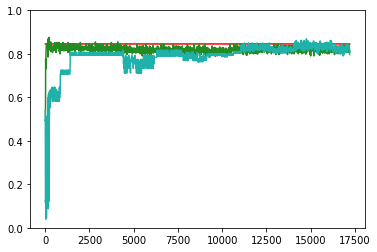

In [175]:
plt.plot(q_qbc_dt, [f1_score_dt] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_dt, f1score_qbc_dt, 'forestgreen')
plt.plot(q_u_log, f1score_r_dt, 'lightseagreen')
plt.ylim(0, 1)

### 4.3.4. Only Support Vector Machine

In [176]:
alg='onlysvm'
quota = len(y_train) - seed
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=[
                    SVM(C=1.0),
                    SVM(C=0.1),
                ])

model = SVM()
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_svc, iter_qbc_svc, f1score_qbc_svc, tn_qbc_svc, fp_qbc_svc,fn_qbc_svc, tp_qbc_svc, k_qbc_svc, trn_dss_qbc_svc, label_holder_qbc_svc, asked_id_qbc_svc = run_faster(trn_ds, tst_ds, y_train, model, qs,X_test, y_test,name,True,run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
train dataset labeled: 17204
train dataset sum: 116
Current f1 score: 0.0
Current progress: 100.0 %
29245.907425880432


(0, 1)

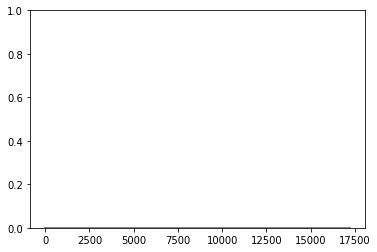

In [177]:
plt.plot(q_qbc_svc, [f1_score_svm] * (len(q_u_dt)), '-r')
plt.plot(q_qbc_svc, f1score_qbc_svc,'forestgreen')
plt.plot(q_u_log, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)

(all models)

(0, 1)

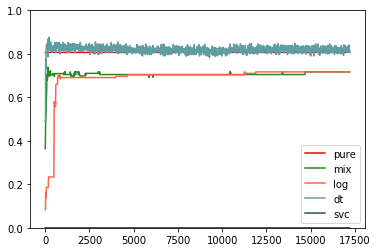

In [178]:
plt.plot(q_u_rf, [f1_score_rf] * (len(q_u_rf)), '-r')
plt.plot(q_u_rf, f1score_qbc_mix, 'forestgreen')
plt.plot(q_u_rf, f1score_qbc_log, 'tomato')
plt.plot(q_u_rf, f1score_qbc_dt, 'cadetblue')
plt.plot(q_u_rf, f1score_qbc_svc, 'darkslategray')

plt.legend((('pure','mix','log','dt','svc')),loc='lower right')
#plt.gca().legend(('y0','y1'))


plt.ylim(0, 1)

# 5. FEATURE SELECTION

- Modeling Parameters

In [179]:
run_=10
missing_option='opt4'
features='fetselect'

In [180]:
# take all the columns
p_result_nomiss_jac=df2[cols_all]
# do train, test split
X_train, X_test, y_train, y_test = train_test_split(p_result_nomiss_jac.drop('match',axis=1).values,p_result_nomiss_jac['match'].values,test_size=0.33,random_state=42)
seed=10
# get the seeds from clusters
samp=get_seed_cluster(y_train, X_train, seed)[0]

trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
tst_ds = Dataset(X_test, y_test)


- Model results (choose features) -> F-Classification

In [181]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif


X_new = SelectKBest(f_classif, k=20).fit(X_train, y_train)
mask = X_new.get_support() #list of booleans
new_features_f = [] # The list of your K best features

for bool, feature in zip(mask, cols_all):
    if bool:
        new_features_f.append(feature)

col_index=[cols_all.index(i) for i in new_features_f]
X_test_feature=[i[col_index] for i in X_test]
X_train_feature=[i[col_index] for i in X_train]

In [182]:
new_features_f

['jac_model',
 'jac_brand',
 'jac_depth',
 'jac_height',
 'jac_weight',
 'jac_dimensions_with_stand',
 'jac_display_resolution',
 'jac_display_type',
 'jac_viewable_size',
 'lev_model',
 'lev_brand',
 'lev_dimensions_with_stand',
 'lev_display_resolution',
 'lev_display_type',
 'lev_viewable_size',
 'jaro_model',
 'jaro_brand',
 'jaro_display_resolution',
 'jaro_display_type',
 'jaro_viewable_size']

In [183]:
from sklearn.linear_model import LogisticRegression as ls 
f1_score_log_fclass, tn_log_fclass, fp_log_fclass, fn_log_fclass, tp_log_fclass = get_base_model_result(y_test, y_train, X_test_feature, X_train_feature, ls())
print(f1_score_log_fclass)
print(tn_log_fclass)
print(fp_log_fclass)
print(fn_log_fclass)
print(tp_log_fclass)

0.6542056074766355
8403
4
33
35


In [184]:
from sklearn.svm import SVC as support_vector
f1_score_svm_fclass, tn_svm_fclass, fp_svm_fclass, fn_svm_fclass, tp_svm_fclass = get_base_model_result(y_test, y_train, X_test_feature, X_train_feature, support_vector())
print(f1_score_svm_fclass)
print(tn_svm_fclass)
print(fp_svm_fclass)
print(fn_svm_fclass)
print(tp_svm_fclass)

0.48888888888888893
8407
0
46
22


In [185]:
from sklearn import tree
f1_score_dt_fclass, tn_dt_fclass, fp_dt_fclass, fn_dt_fclass, tp_dt_fclass = get_base_model_result(y_test, y_train, X_test_feature, X_train_feature, tree.DecisionTreeClassifier())
print(f1_score_dt_fclass)
print(tn_dt_fclass)
print(fp_dt_fclass)
print(fn_dt_fclass)
print(tp_dt_fclass)

0.7433628318584071
8404
3
26
42


In [186]:
f1_score_rf_fclass, tn_rf_fclass, fp_rf_fclass, fn_rf_fclass, tp_rf_fclass = get_base_model_result(y_test, y_train, X_test_feature, X_train_feature, RandomForestClassifier())
print(f1_score_rf_fclass)
print(tn_rf_fclass)
print(fp_rf_fclass)
print(fn_rf_fclass)
print(tp_rf_fclass)

0.7350427350427351
8401
6
25
43


## 5.1. Random Sampling

In [187]:
q_type='random'

In [188]:
run_

10

### 5.1.1. Logistic Regression

In [189]:
alg='log'
model_ = LogisticRegression()
method_='lc'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = RandomSampling(trn_ds, method=method_, model=model_)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_r_log, iter_r_log, f1score_r_log, tn_r_log, fp_r_log,fn_r_log, tp_r_log, k_r_log, trn_dss_r_log, label_holder_r_log, asked_id_r_log, featur_log_r = run_featureselection(trn_ds, tst_ds, y_train, model_, method_, qs, X_test, y_test, cols_all, name,True,'random', run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
iteration: 1719
1720
train dataset labeled: 17204
train dataset shape: (17204, 201)
train dataset sum: 116
Current f1 score: 0.6542056074766355
Current progress: 100.0 %
Chosen_features: ['jac_model', 'jac_brand', 'jac_depth', 'jac_height', 'jac_weight', 'jac_dimensions_with_stand', 'jac_display_resolution', 'jac_display_type', 'jac_viewable_size', 'lev_model', 'lev_brand', 'lev_dimensions_with_stand', 'lev_display_resolution', 'lev_display_type', 'lev_viewable_size', 'jaro_model', 'jaro_brand', 'jaro_display_resolution', 'jaro_display_type', 'jaro_viewable_size']
1226.0156631469727


(0, 1)

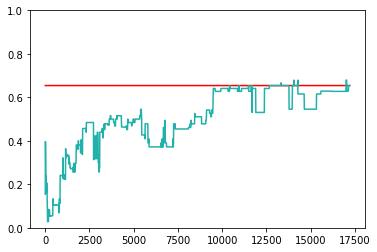

In [190]:
plt.plot(q_r_log, [f1_score_log_fclass] * (len(q_r_log)), '-r')
plt.plot(q_r_log, f1score_r_log,'lightseagreen')
plt.ylim(0, 1)

In [191]:
start_time

1565169322.762272

### 5.1.2. Support Vector Machine

In [192]:
alg='svm'
model_ = SVM()
method_='lc'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = RandomSampling(trn_ds, method=method_, model=model_)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_r_svm, iter_r_svm, f1score_r_svm, tn_r_svm, fp_r_svm,fn_r_svm, tp_r_svm, k_r_svm, trn_dss_r_svm, label_holder_r_svm, asked_id_r_svm, featur_r_svm = run_featureselection(trn_ds, tst_ds, y_train, model_, method_, qs, X_test, y_test, cols_all, name,True,'random', run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
iteration: 1719
1720
train dataset labeled: 17204
train dataset shape: (17204, 201)
train dataset sum: 116
Current f1 score: 0.48888888888888893
Current progress: 100.0 %
Chosen_features: ['jac_model', 'jac_brand', 'jac_depth', 'jac_height', 'jac_weight', 'jac_dimensions_with_stand', 'jac_display_resolution', 'jac_display_type', 'jac_viewable_size', 'lev_model', 'lev_brand', 'lev_dimensions_with_stand', 'lev_display_resolution', 'lev_display_type', 'lev_viewable_size', 'jaro_model', 'jaro_brand', 'jaro_display_resolution', 'jaro_display_type', 'jaro_viewable_size']
1354.3065378665924


(0, 1)

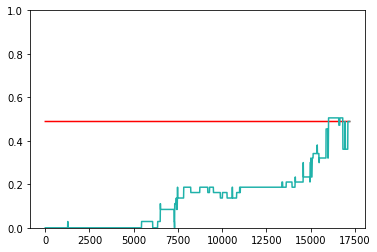

In [193]:
plt.plot(q_r_svm, [f1_score_svm_fclass] * (len(q_r_svm)), '-r')
plt.plot(q_r_svm, f1score_r_svm,'lightseagreen')
plt.ylim(0, 1)

## 5.2. Uncertainty Sampling

In [194]:
q_type='uncertainity'

### 5.2.1. Logistic Regression

In [195]:
alg='log'
model_ = LogisticRegression()
method_='lc'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = UncertaintySampling(trn_ds, method=method_, model=model_)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_u_log, iter_u_log, f1score_u_log, tn_u_log, fp_u_log,fn_u_log, tp_u_log, k_u_log, trn_dss_u_log, label_holder_u_log, asked_id_u_log, featur_log_u = run_featureselection(trn_ds, tst_ds, y_train, model_,method_, qs, X_test, y_test,cols_all,name,True,'unc',run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
iteration: 1719
1720
train dataset labeled: 17204
train dataset shape: (17204, 201)
train dataset sum: 116
Current f1 score: 0.6542056074766355
Current progress: 100.0 %
Chosen_features: ['jac_model', 'jac_brand', 'jac_depth', 'jac_height', 'jac_weight', 'jac_dimensions_with_stand', 'jac_display_resolution', 'jac_display_type', 'jac_viewable_size', 'lev_model', 'lev_brand', 'lev_dimensions_with_stand', 'lev_display_resolution', 'lev_display_type', 'lev_viewable_size', 'jaro_model', 'jaro_brand', 'jaro_display_resolution', 'jaro_display_type', 'jaro_viewable_size']
2858.93874168396


(0, 1)

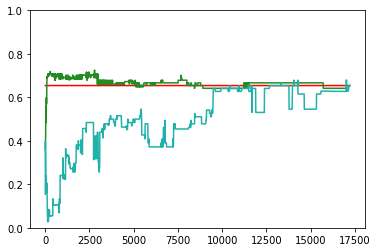

In [196]:
plt.plot(q_u_log, [f1_score_log_fclass] * (len(q_u_log)), '-r')
plt.plot(q_u_log, f1score_u_log, 'forestgreen')
plt.plot(q_u_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)

### 5.1.2. Support Vector Machine

In [197]:
alg='svm'
model_=SVM()
method_='lc'
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = UncertaintySampling(trn_ds, method=method_, model=model_)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_u_svm, iter_u_svm, f1score_u_svm, tn_u_svm, fp_u_svm,fn_u_svm, tp_u_svm, k_u_svm, trn_dss_u_svm, label_holder_u_svm, asked_id_u_svm, featur_log_svm = run_featureselection(trn_ds, tst_ds, y_train, model_,method_, qs, X_test, y_test,cols_all,name,True,'unc',run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
iteration: 1719
1720
train dataset labeled: 17204
train dataset shape: (17204, 201)
train dataset sum: 116
Current f1 score: 0.48888888888888893
Current progress: 100.0 %
Chosen_features: ['jac_model', 'jac_brand', 'jac_depth', 'jac_height', 'jac_weight', 'jac_dimensions_with_stand', 'jac_display_resolution', 'jac_display_type', 'jac_viewable_size', 'lev_model', 'lev_brand', 'lev_dimensions_with_stand', 'lev_display_resolution', 'lev_display_type', 'lev_viewable_size', 'jaro_model', 'jaro_brand', 'jaro_display_resolution', 'jaro_display_type', 'jaro_viewable_size']
4619.938600301743


(0, 1)

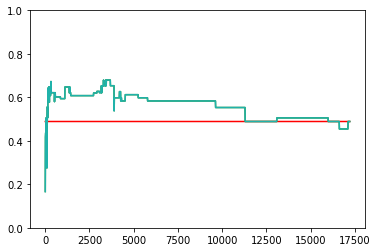

In [198]:
plt.plot(q_u_svm, [f1_score_svm_fclass] * (len(q_u_svm)), '-r')
plt.plot(q_u_svm, f1score_u_svm, 'forestgreen')
plt.plot(q_u_svm, f1score_u_svm, 'lightseagreen')
plt.ylim(0, 1)


## 5.4. Query by Committee

In [199]:
q_type='qbc'

### 5.4.1. Mix of all the models

In [200]:
alg='mixall'
model_= [SklearnProbaAdapter(tree.DecisionTreeClassifier()),
    LogisticRegression(),
    SVM()]
method_=LogisticRegression()
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=model_)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_mix, iter_qbc_mix, f1score_qbc_mix, tn_qbc_mix, fp_qbc_mix,fn_qbc_mix, tp_qbc_mix, k_qbc_mix, trn_dss_qbc_mix, label_holder_qbc_mix, asked_id_qbc_mix, featur_log_qbc = run_featureselection(trn_ds, tst_ds, y_train, model_,method_, qs,X_test, y_test,cols_all,name,True,'qbc',run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
iteration: 1719
1720
train dataset labeled: 17204
train dataset shape: (17204, 201)
train dataset sum: 116
Current f1 score: 0.6542056074766355
Current progress: 100.0 %
Chosen_features: ['jac_model', 'jac_brand', 'jac_depth', 'jac_height', 'jac_weight', 'jac_dimensions_with_stand', 'jac_display_resolution', 'jac_display_type', 'jac_viewable_size', 'lev_model', 'lev_brand', 'lev_dimensions_with_stand', 'lev_display_resolution', 'lev_display_type', 'lev_viewable_size', 'jaro_model', 'jaro_brand', 'jaro_display_resolution', 'jaro_display_type', 'jaro_viewable_size']
38992.96553707123


(0, 1)

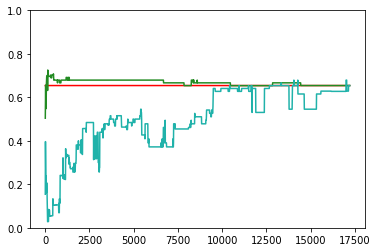

In [201]:
plt.plot(q_qbc_mix, [f1_score_log_fclass] * (len(q_qbc_mix)), '-r')
plt.plot(q_qbc_mix, f1score_qbc_mix, 'forestgreen')
plt.plot(q_qbc_mix, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)

### 5.4.2. Only Logistic Regression

In [202]:
alg='log'
model_= [LogisticRegression(C=1.0),
        LogisticRegression(C=0.1)]
method_=LogisticRegression()
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=model_)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_log, iter_qbc_log, f1score_qbc_log, tn_qbc_log, fp_qbc_log,fn_qbc_log, tp_qbc_log, k_qbc_log, trn_dss_qbc_log, label_holder_qbc_log, asked_id_qbc_log, featur_loglog_qbc = run_featureselection(trn_ds, tst_ds, y_train, model_, method_,qs,X_test, y_test,cols_all,name,True,'qbc',run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
iteration: 1719
1720
train dataset labeled: 17204
train dataset shape: (17204, 201)
train dataset sum: 116
Current f1 score: 0.6542056074766355
Current progress: 100.0 %
Chosen_features: ['jac_model', 'jac_brand', 'jac_depth', 'jac_height', 'jac_weight', 'jac_dimensions_with_stand', 'jac_display_resolution', 'jac_display_type', 'jac_viewable_size', 'lev_model', 'lev_brand', 'lev_dimensions_with_stand', 'lev_display_resolution', 'lev_display_type', 'lev_viewable_size', 'jaro_model', 'jaro_brand', 'jaro_display_resolution', 'jaro_display_type', 'jaro_viewable_size']
23984.862746953964


(0, 1)

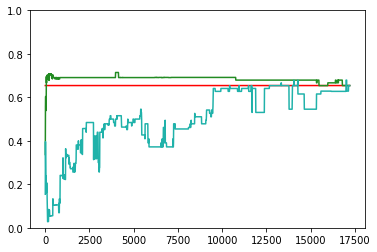

In [203]:
plt.plot(q_qbc_log, [f1_score_log_fclass] * (len(q_qbc_log)), '-r')
plt.plot(q_qbc_log, f1score_qbc_log, 'forestgreen')
plt.plot(q_qbc_log, f1score_r_log, 'lightseagreen')
plt.ylim(0, 1)

### 5.4.3. Only Support Vector Machine

In [204]:
alg='svm'
model_= [SVM(C=1.0),
         SVM(C=0.1)]
method_=SVM()
start_time = time.time()
trn_ds = Dataset(X_train, prepare_ytrain_foract(y_train, samp))
qs = QueryByCommittee(trn_ds, models=model_)
name='Faster_Phone_'+missing_option+'_'+features+'_'+q_type+'_'+alg+'_'+str(run_)
#r,iter_,f1,askid,lbls=run_20(trn_ds, tst_ds, y_train, model, qs, quota, X_test, y_test,name)
q_qbc_svc, iter_qbc_svc, f1score_qbc_svc, tn_qbc_svc, fp_qbc_svc,fn_qbc_svc, tp_qbc_svc, k_qbc_svc, trn_dss_qbc_svc, label_holder_qbc_svc, asked_id_qbc_svc, featur_svm_qbc = run_featureselection(trn_ds, tst_ds, y_train, model_, method_, qs, X_test, y_test,cols_all,name,True,'qbc',run_)
end_time = time.time()
print(end_time-start_time)

17204
17204
iteration: 1719
1720
train dataset labeled: 17204
train dataset shape: (17204, 201)
train dataset sum: 116
Current f1 score: 0.48888888888888893
Current progress: 100.0 %
Chosen_features: ['jac_model', 'jac_brand', 'jac_depth', 'jac_height', 'jac_weight', 'jac_dimensions_with_stand', 'jac_display_resolution', 'jac_display_type', 'jac_viewable_size', 'lev_model', 'lev_brand', 'lev_dimensions_with_stand', 'lev_display_resolution', 'lev_display_type', 'lev_viewable_size', 'jaro_model', 'jaro_brand', 'jaro_display_resolution', 'jaro_display_type', 'jaro_viewable_size']
37464.25991606712


(0, 1)

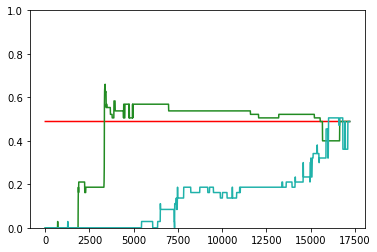

In [205]:
plt.plot(q_qbc_svc, [f1_score_svm_fclass] * (len(q_qbc_log)), '-r')
plt.plot(q_qbc_svc, f1score_qbc_svc, 'forestgreen')
plt.plot(q_qbc_svc, f1score_r_svm, 'lightseagreen')
plt.ylim(0, 1)